# Laboratorio 1 

In [402]:

pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm

#Lectura y transformación de datos
pd.set_option('display.float_format', '{:.2f}'.format)

c2024 = pd.read_excel("./Data/Consumos_2024.xlsx", skiprows = 6, nrows = 300) #Solo 300 registros
c2025 = pd.read_excel("./Data/Consumos_2025.xlsx", skiprows = 6, nrows = 5)
precios = pd.read_excel("./Data/Precios_combustibles.xlsx", skiprows = 7, nrows = 195)
precios = precios.drop(precios.index[0]).reset_index(drop=True)
consumos = pd.concat([c2024, c2025], ignore_index= True)
i2024 = pd.read_excel("./Data/Importaciones_combustibles_2024.xlsx", skiprows = 6, nrows = 288)
i2025 = pd.read_excel("./Data/Importaciones_combustibles_2025.xlsx", skiprows = 6, nrows = 5)
for df in (i2024, i2025):
    df.columns = (
        df.columns
          .str.strip()      
          .str.lower()      
)
importaciones = pd.concat([i2024, i2025], ignore_index = True)
importaciones.loc[:203, 'diesel bajo azufre'] = importaciones.loc[:203, 'diesel alto azufre']
importaciones['Diesel'] = importaciones['diesel bajo azufre']
consumos.loc[:203, 'Diesel bajo azufre'] = consumos.loc[:203, 'Diesel alto azufre']
consumos['Diesel'] = consumos['Diesel bajo azufre']
consumos['Fecha'] = pd.to_datetime(consumos['Fecha']).dt.strftime('%Y-%m')
importaciones['Fecha'] = pd.to_datetime(consumos['Fecha']).dt.strftime('%Y-%m')




def graficar_histogramas_boxplot(dataframe, tipo_gasolina, titulo_hist, titulo_box ):
    sns.histplot(
    data=dataframe,
    x=tipo_gasolina,
    stat="density",
    kde=True,
    bins=30
    )
    plt.title(titulo_hist)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

    plt.figure()
    sns.boxplot(x=dataframe[tipo_gasolina])
    plt.title(titulo_box)
    plt.show()

def graficar_barras(dataset, xTitle, yTitle, generalTitle):
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(dataset.index, dataset.values, width=0.8)
    ax.set_xlabel(xTitle, fontsize=12)
    ax.set_ylabel(yTitle, fontsize=12)
    ax.set_title(generalTitle, fontsize=14, pad=15)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.xticks(dataset.index, rotation=45)
    plt.tight_layout()
    plt.show()






# Análisis exploratorio

Primero haremos un resumen de las variables objetivo

## Consumos

### Resumen inicial de los datos

In [404]:
consumos[['Gasolina regular', 'Gasolina superior', 'Gas licuado de petróleo', 'Diesel']].describe()

Gasolina regular  Gasolina superior  Gas licuado de petróleo     Diesel
count            305.00             305.00                   305.00     305.00
mean          405016.80          474465.50                322885.82  880197.59
std           225100.21          117354.12                118981.77  231982.99
min           160741.90          300242.78                167818.14  507662.65
25%           216560.79          385044.97                227154.97  701255.47
50%           290286.65          424438.71                268875.10  807692.10
75%           570267.25          575720.92                407953.78 1062409.16
max           942394.34          790948.04                600453.87 1474651.06

Del resumen inicial podemos ver estos detalles interesantes:

- El valor máxmo encontrado en los consumos de la gasolina regular puede ser considerado como un dato atípico porque vemos que la mayoría de la información se concentra en un rango de GTQ.210,000.00 y GTQ.570,000.00. Solamente un 25% se encuentra por encima de esos valores y vemos que la media posiblemente este siendo afectada por ese valor pues está bastante alejada de la media. 
- El diesel tiene un precio superior al resto de combustibles o es más consumido que los demás pues sus valores de media son mayores a los de los demás combustibles.  
- La gasolina superior, el gas licuado de petroleo y el diesel no muestran una diferencia tan pronunciada entre la mediana y le media como la gasolina regular, esto podría indicar que tienen una distribución normal. 

### Valores NA

Ahora veremos cuales variables tienen valores NA 

In [405]:
print(f"NA's en la variable de gasolina regular {consumos['Gasolina regular'].isna().sum()} ")
print(f"NA's en la variable de gasolina superior {consumos['Gasolina superior'].isna().sum()} ")
print(f"NA's en la variable del gas licuado de petróleo {consumos['Gas licuado de petróleo'].isna().sum()}")
print(f"NA's en la variable del diesel {consumos['Diesel'].isna().sum()} ")


NA's en la variable de gasolina regular 0 
NA's en la variable de gasolina superior 0 
NA's en la variable del gas licuado de petróleo 0
NA's en la variable del diesel 0 


Vemos que no hay nigún NA en ninguna de las columnas, por lo tanto no haremos operaciones de sustitución de valores y limpieza. 

### Histogramas y distribución

Ahora haremos histogramas y confirmaremos nuestras primeras conjeturas sobre los datos que hicimos en base al resumen anterior. 

Primero vamos con la distribución de la gasolina regular

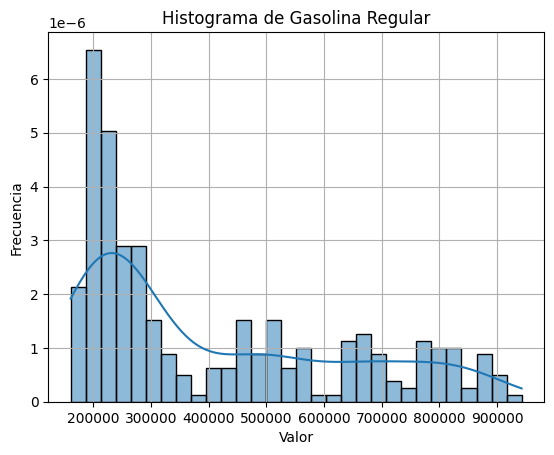

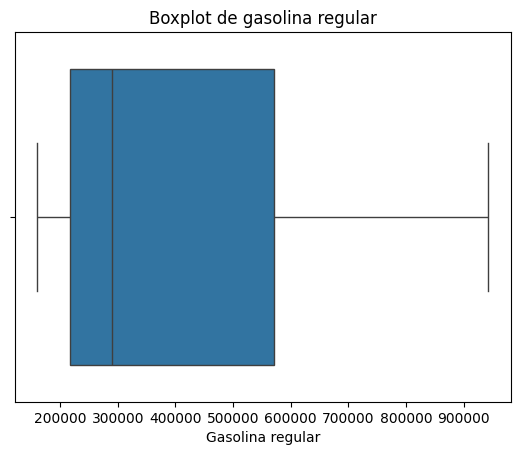

In [406]:

graficar_histogramas_boxplot(consumos, "Gasolina regular", "Histograma de Gasolina Regular", "Boxplot de gasolina regular")


Vemos que los datos tienen una sesgo positivo a la derecha, la mayoría de la información está concentrada entre el valor mínimo y el percentil 75. Por el momento no haremos ninguna tranformación pues los valores atípicos podrían representar algún patrón en la serie de tiempo. 

Ahora veremos la distribución de la gasolina superior

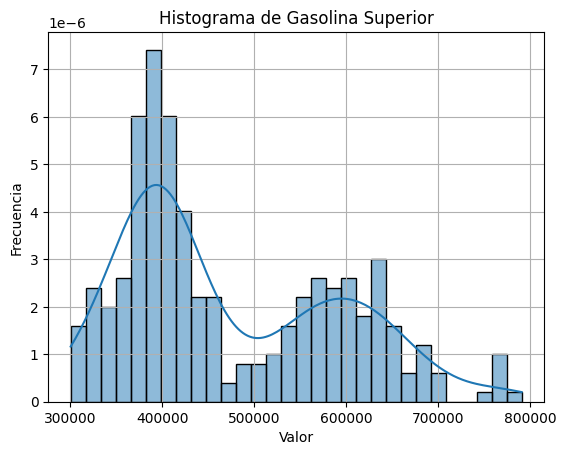

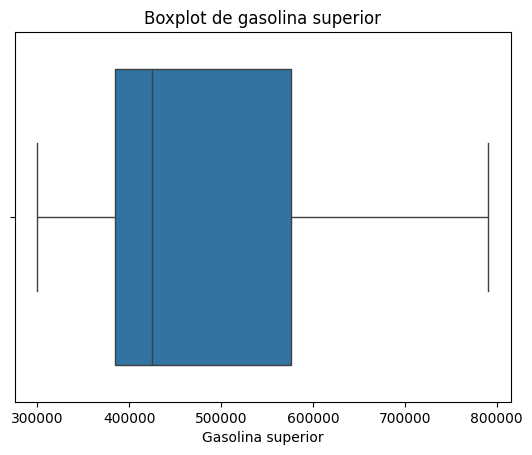

In [407]:

graficar_histogramas_boxplot(consumos, "Gasolina superior", "Histograma de Gasolina Superior", "Boxplot de gasolina superior")

Se puede notar que hay 2 picos enla distribución aunque uno es más pronunciado que otro, podemos dedecuir que la información para este tipo de combustible tiene una distribución bimodal. Esto puede sugerir que en la serie de tiempo podamos llegar a encontrar estacionalidad pues hay ciertos periodos de tiempo en donde las ventas aumentan o que desde hace algunos años haya alguna tendencia a la alta para los consumos d eeste tipo de combustible. 

Ahora veremos para el gas licuado de petróleo

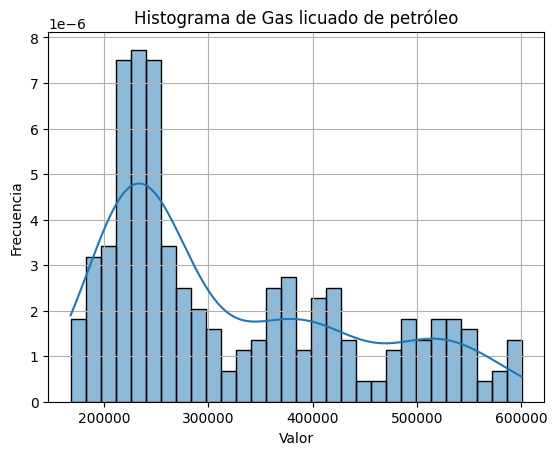

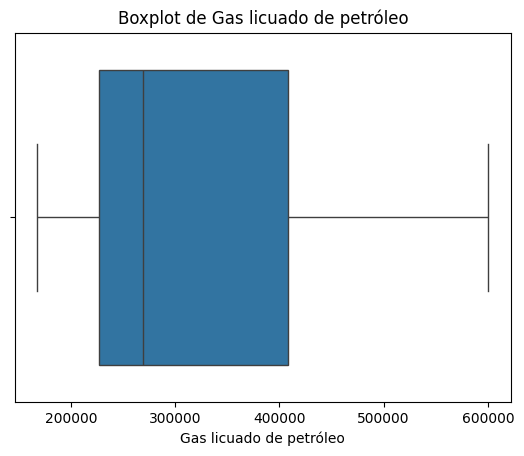

In [408]:

graficar_histogramas_boxplot(consumos, "Gas licuado de petróleo", "Histograma de Gas licuado de petróleo", "Boxplot de Gas licuado de petróleo")

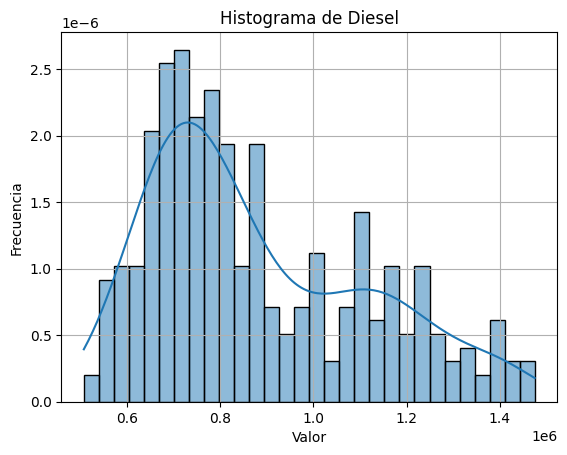

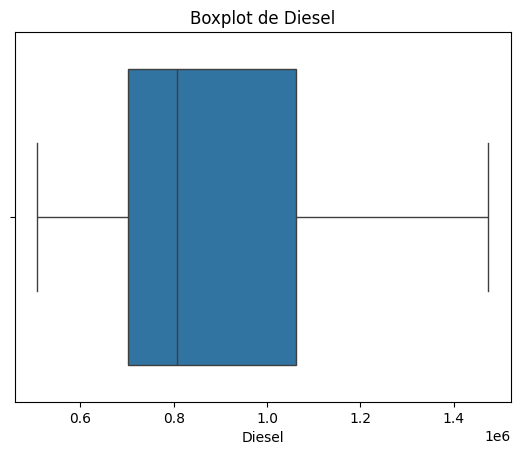

In [409]:
graficar_histogramas_boxplot(consumos, "Diesel", "Histograma de Diesel", "Boxplot de Diesel")

### Evolución temporal

Ahora veremos la evolución de los consumos de los diferentes tipos de combustibles a lo largo del tiempo. 

Primero vamos con la gasolina regular

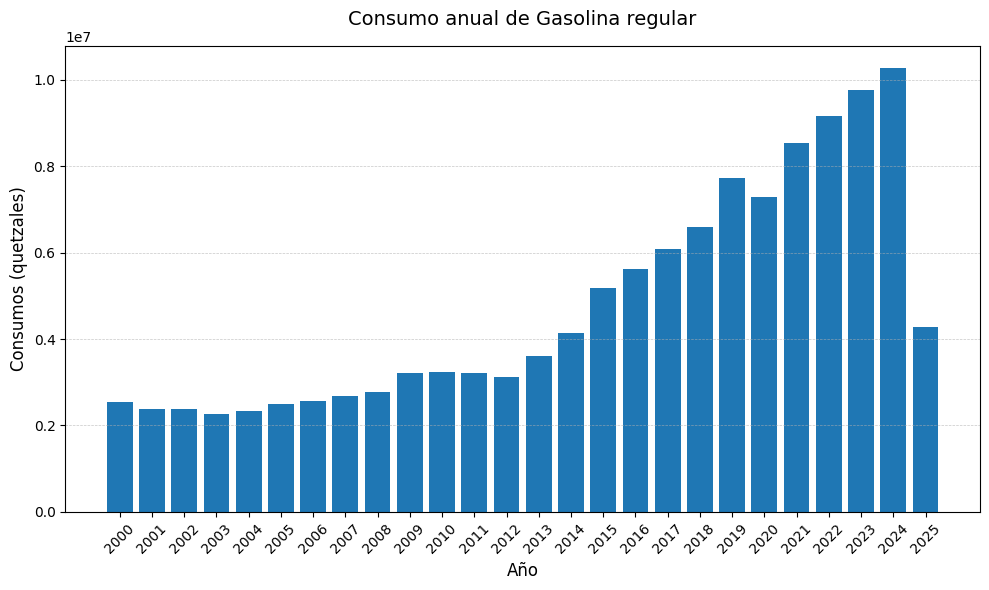

In [410]:
consumos['Fecha'] = pd.to_datetime(consumos['Fecha'], format='%Y-%m')
consumos['año'] = consumos['Fecha'].dt.year
consumos_grouped = consumos.groupby('año')


suma_regular = consumos_grouped['Gasolina regular'].sum()

    
graficar_barras(suma_regular, 'Año', 'Consumos (quetzales)', 'Consumo anual de Gasolina regular')

Ahora vamos con la gasolina superior

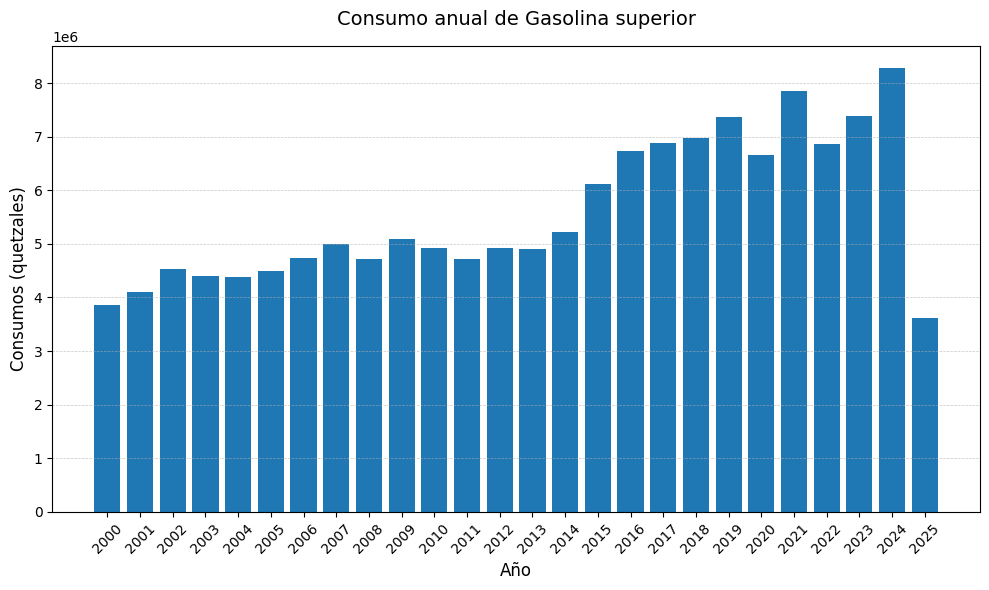

In [411]:
suma_superior = consumos_grouped['Gasolina superior'].sum()

graficar_barras(suma_superior, 'Año', 'Consumos (quetzales)', 'Consumo anual de Gasolina superior')

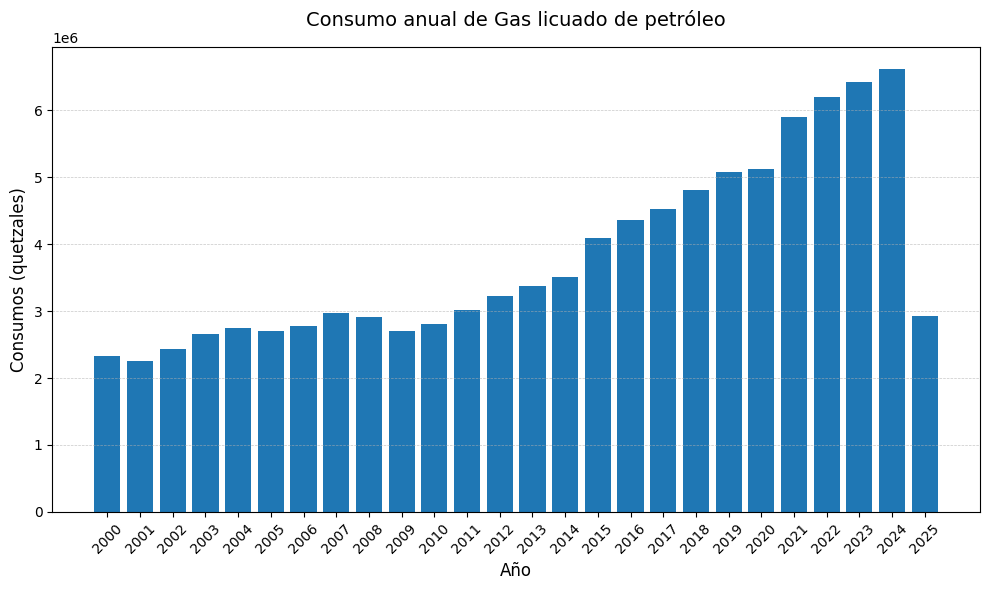

In [412]:
suma_gas_licuado = consumos_grouped['Gas licuado de petróleo'].sum()

graficar_barras(suma_gas_licuado, 'Año', 'Consumos (quetzales)', 'Consumo anual de Gas licuado de petróleo')

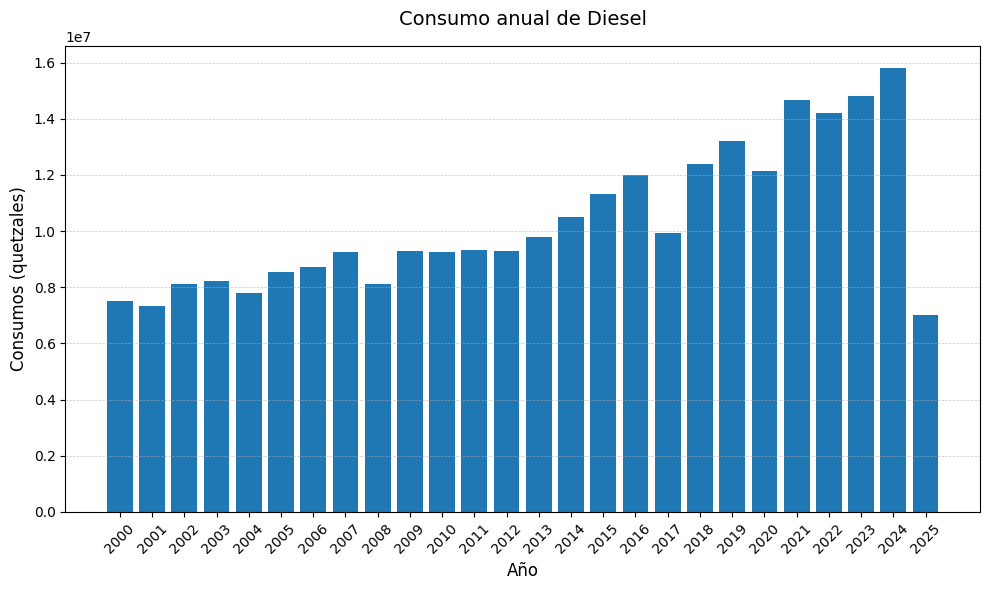

In [413]:
suma_diesel = consumos_grouped['Diesel'].sum()

graficar_barras(suma_diesel, 'Año', 'Consumos (quetzales)', 'Consumo anual de Diesel')


### Evolución por mes

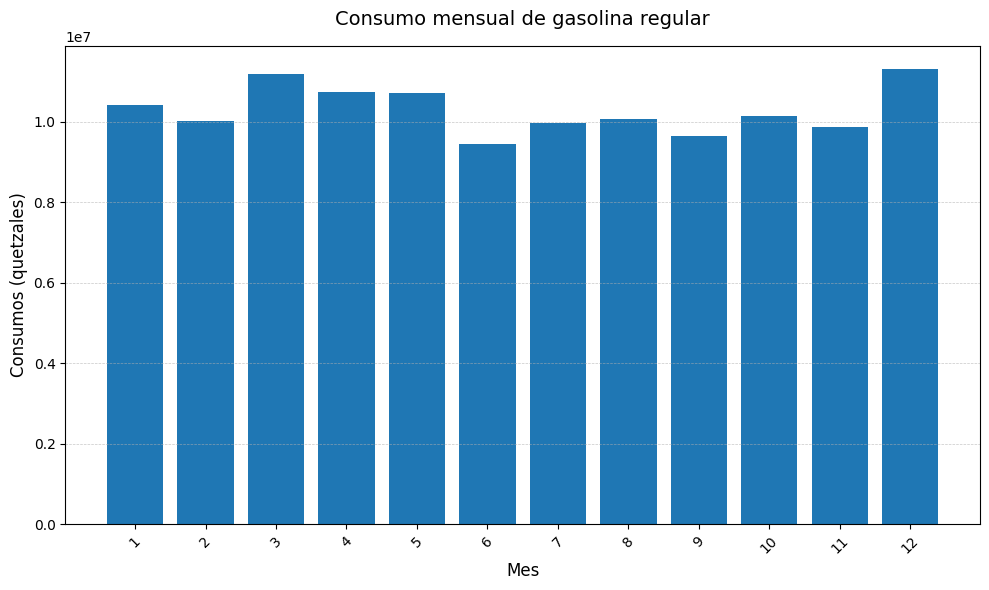

In [414]:
consumos['mes'] = consumos['Fecha'].dt.month
consumos_grouped_monthly = consumos.groupby('mes')


suma_regular_mensual = consumos_grouped_monthly['Gasolina regular'].sum()

graficar_barras(suma_regular_mensual, 'Mes', 'Consumos (quetzales)', 'Consumo mensual de gasolina regular')

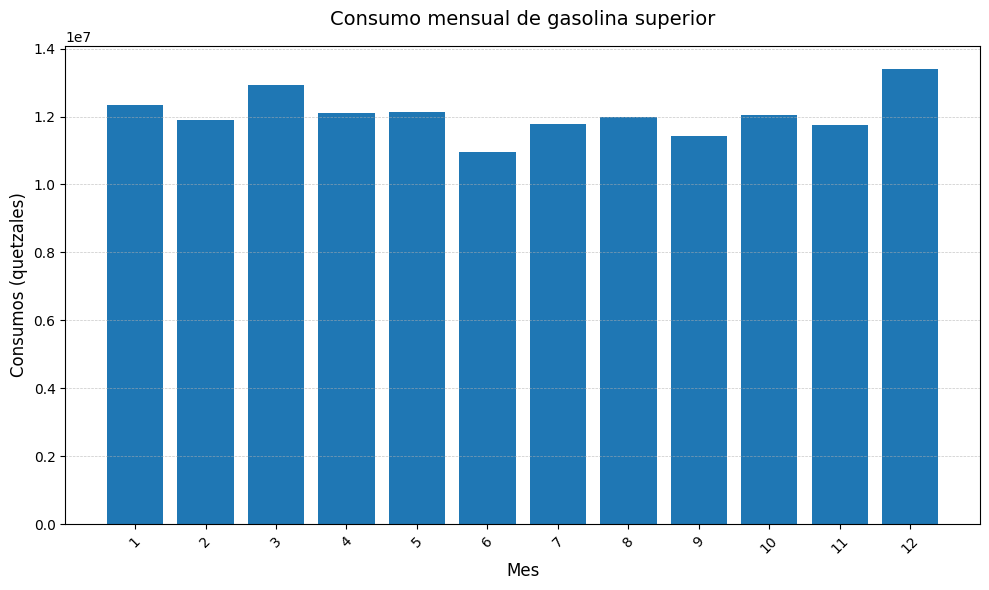

In [415]:
suma_superior_mensual = consumos_grouped_monthly['Gasolina superior'].sum()

graficar_barras(suma_superior_mensual, 'Mes', 'Consumos (quetzales)', 'Consumo mensual de gasolina superior')

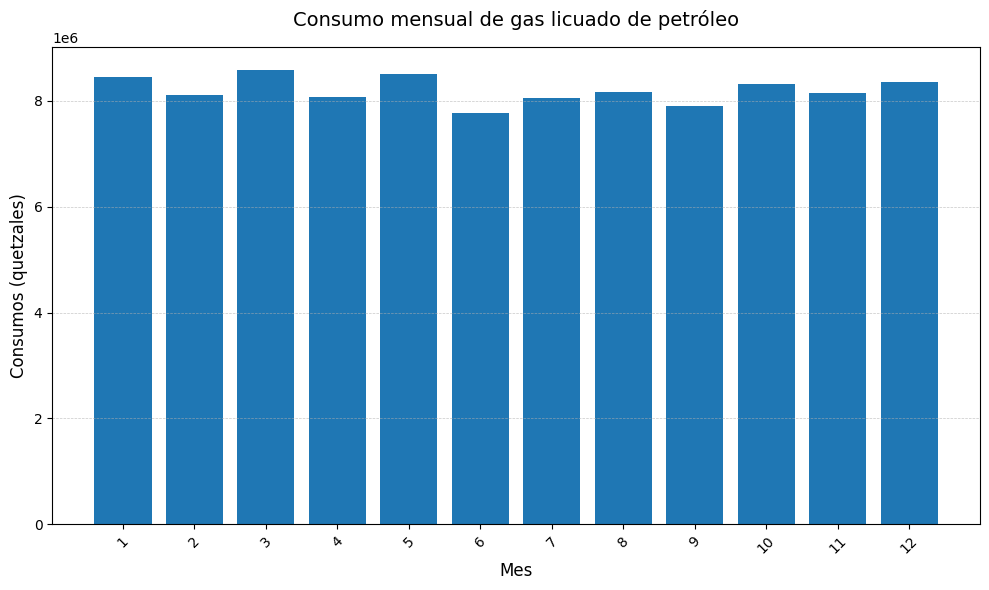

In [416]:
suma_gas_mensual = consumos_grouped_monthly['Gas licuado de petróleo'].sum()

graficar_barras(suma_gas_mensual, 'Mes', 'Consumos (quetzales)', 'Consumo mensual de gas licuado de petróleo')

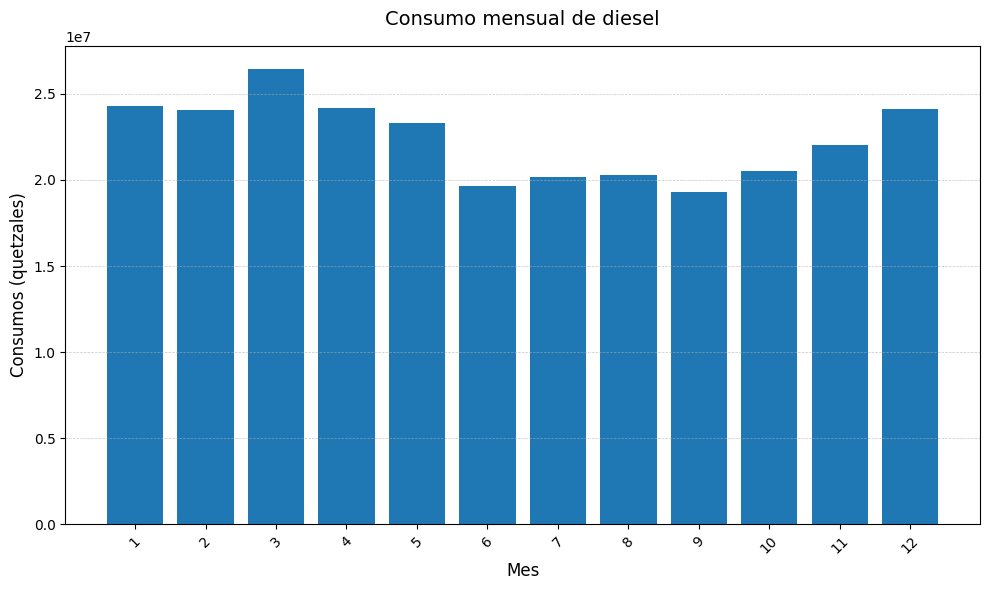

In [417]:
suma_diesel_mensual = consumos_grouped_monthly['Diesel bajo azufre'].sum()

graficar_barras(suma_diesel_mensual, 'Mes', 'Consumos (quetzales)', 'Consumo mensual de diesel')

## Importaciones

In [418]:
importaciones[['gasolina regular', 'gasolina superior', 'gas licuado de petróleo', 'Diesel']].describe()

gasolina regular  gasolina superior  gas licuado de petróleo     Diesel
count            293.00             293.00                   293.00     293.00
mean          419995.88          494587.46                422203.68  899560.96
std           247117.97          157844.29                205906.33  294522.86
min            81015.30          170292.50                100561.47  229764.74
25%           208796.02          372486.53                230584.60  693160.50
50%           336005.72          491194.71                416068.30  850806.89
75%           592103.31          616269.01                584709.61 1130870.79
max          1141365.94         1227173.53               1077122.75 1617427.16

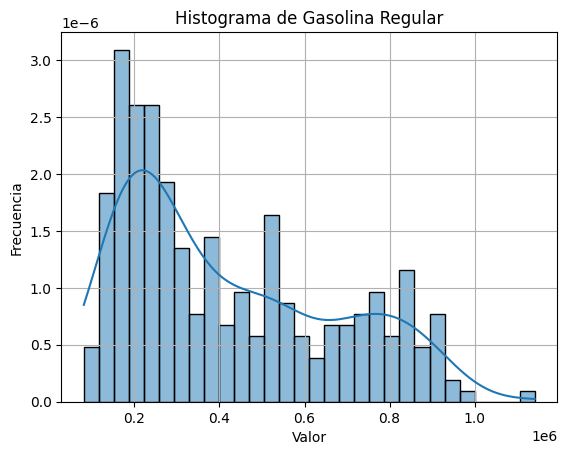

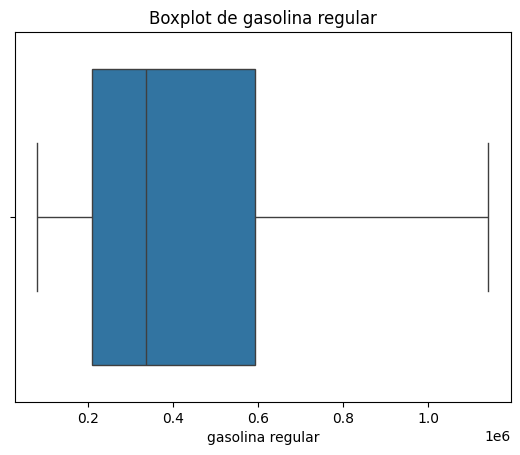

In [419]:

graficar_histogramas_boxplot(importaciones, "gasolina regular", "Histograma de Gasolina Regular", "Boxplot de gasolina regular")

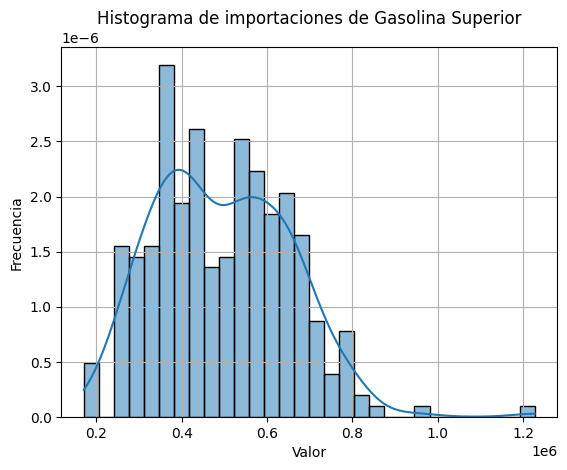

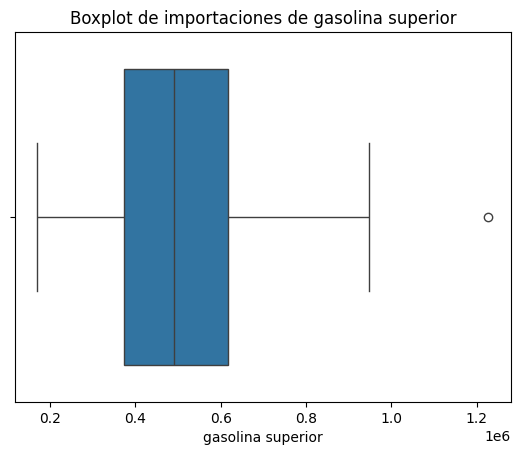

In [420]:

graficar_histogramas_boxplot(importaciones, "gasolina superior", "Histograma de importaciones de Gasolina Superior", "Boxplot de importaciones de gasolina superior")

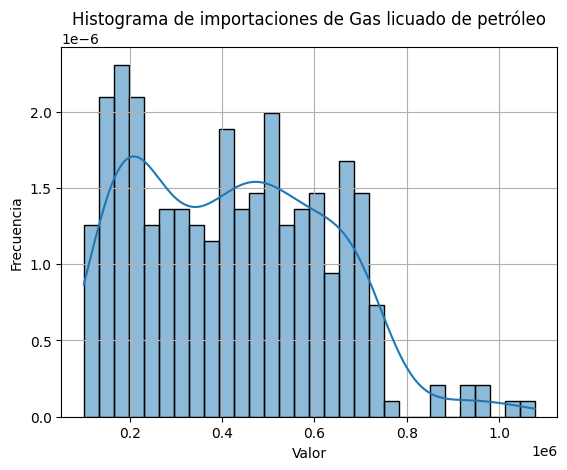

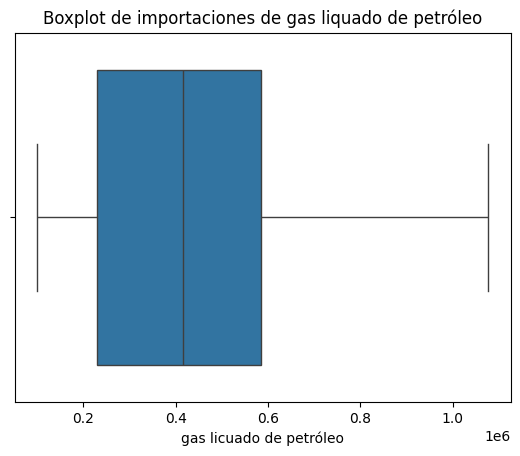

In [421]:
graficar_histogramas_boxplot(importaciones, "gas licuado de petróleo", "Histograma de importaciones de Gas licuado de petróleo", "Boxplot de importaciones de gas liquado de petróleo")

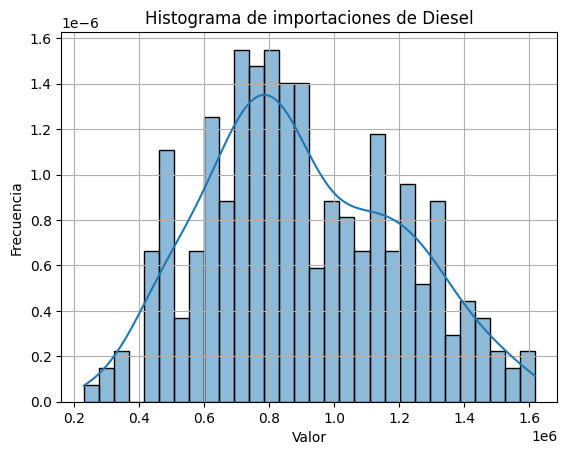

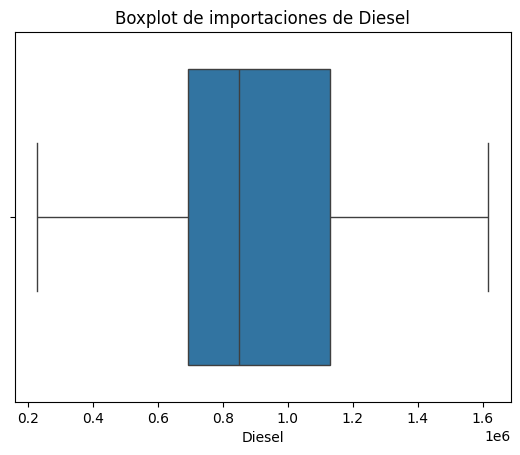

In [422]:
graficar_histogramas_boxplot(importaciones, "Diesel", "Histograma de importaciones de Diesel", "Boxplot de importaciones de Diesel")

In [423]:
from scipy import stats
k2, p = stats.normaltest(importaciones['Diesel'])
print("D’Agostino-Pearson p-value:", p)
w, p_shapiro = stats.shapiro(importaciones['Diesel'])  # si n < 5000
print("Shapiro‑Wilk p-value:", p_shapiro)

D’Agostino-Pearson p-value: 0.0018020341972871706
Shapiro‑Wilk p-value: 0.0012189337331685722


### Evolución temporal

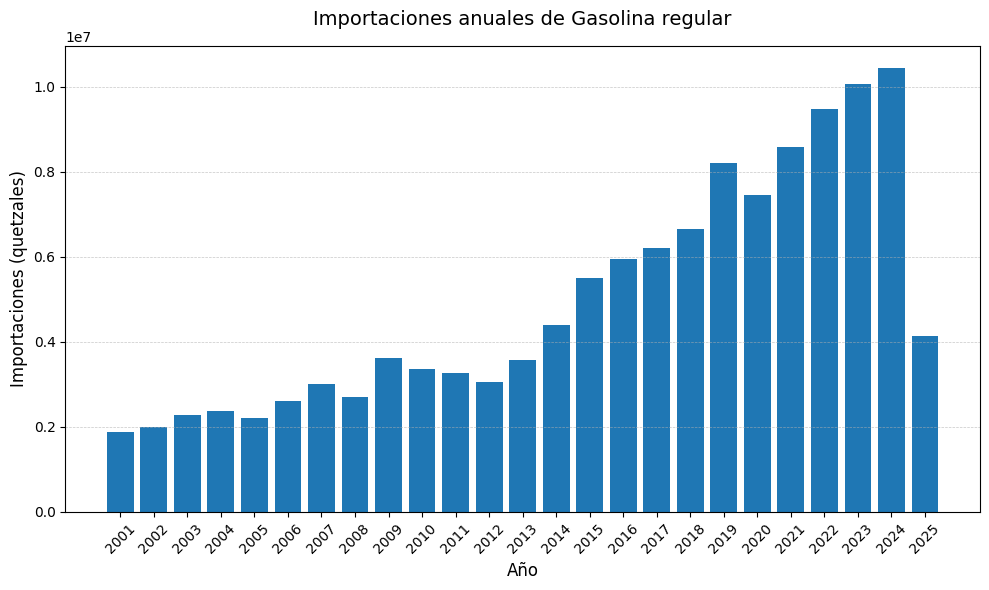

In [424]:
importaciones['fecha'] = pd.to_datetime(importaciones['fecha'] , format='%Y-%m')
importaciones['año'] = importaciones['fecha'] .dt.year
importaciones_grouped = importaciones.groupby('año')


suma_regular_i = importaciones_grouped['gasolina regular'].sum()

    
graficar_barras(suma_regular_i, 'Año', 'Importaciones (quetzales)', 'Importaciones anuales de Gasolina regular')

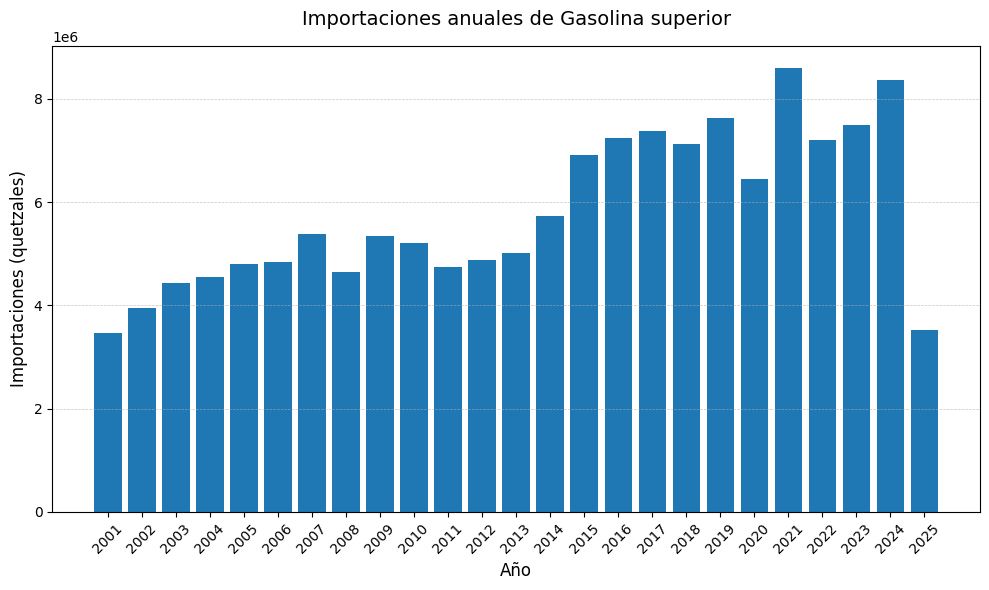

In [425]:
suma_superior_i = importaciones_grouped['gasolina superior'].sum()

    
graficar_barras(suma_superior_i, 'Año', 'Importaciones (quetzales)', 'Importaciones anuales de Gasolina superior')

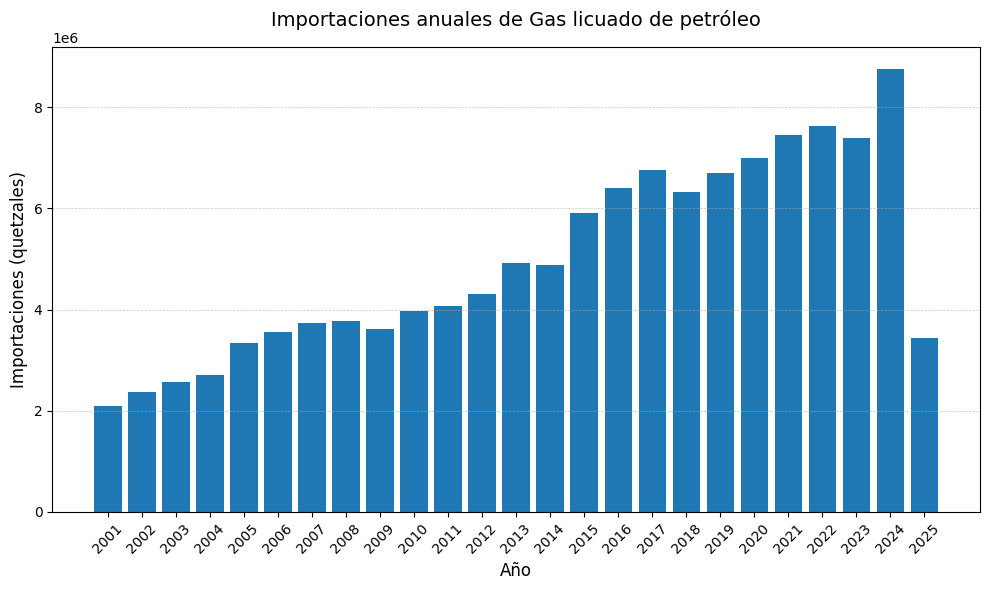

In [426]:
suma_gas_i = importaciones_grouped['gas licuado de petróleo'].sum()

    
graficar_barras(suma_gas_i, 'Año', 'Importaciones (quetzales)', 'Importaciones anuales de Gas licuado de petróleo')

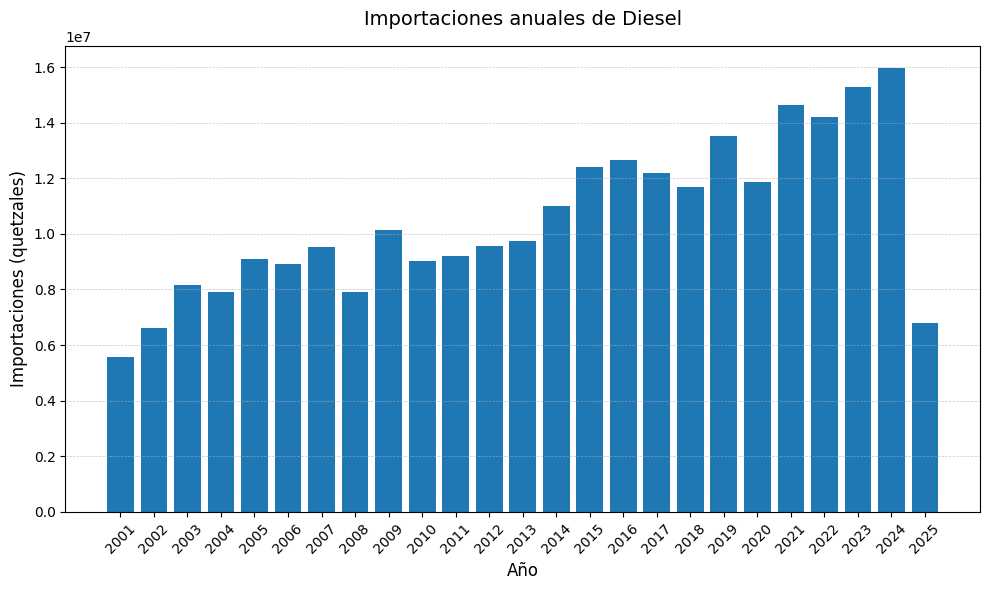

In [427]:
suma_diesel_i = importaciones_grouped['Diesel'].sum()

    
graficar_barras(suma_diesel_i, 'Año', 'Importaciones (quetzales)', 'Importaciones anuales de Diesel')

#### Evolución por mes

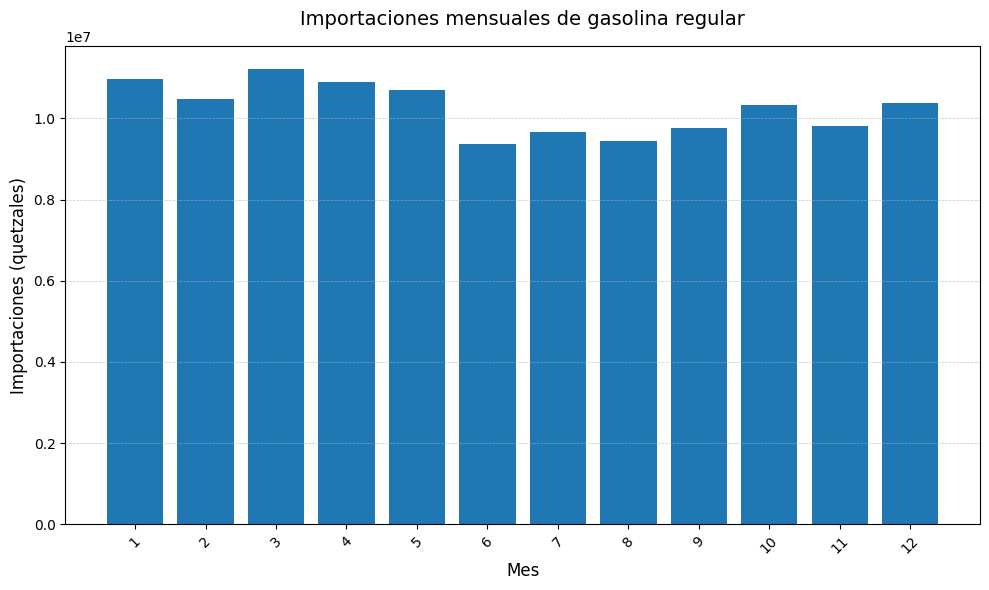

In [428]:
importaciones['mes'] = importaciones['fecha'].dt.month
importaciones_grouped_monthly = importaciones.groupby('mes')


suma_regular_mensual_i = importaciones_grouped_monthly['gasolina regular'].sum()

graficar_barras(suma_regular_mensual_i, 'Mes', 'Importaciones (quetzales)', 'Importaciones mensuales de gasolina regular')

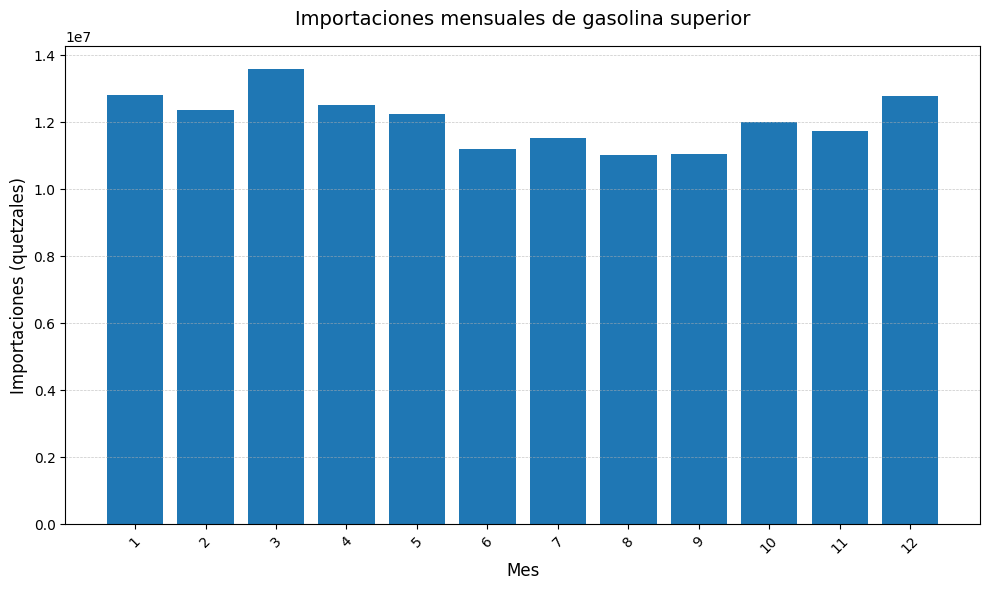

In [429]:
suma_superior_mensual_i = importaciones_grouped_monthly['gasolina superior'].sum()

graficar_barras(suma_superior_mensual_i, 'Mes', 'Importaciones (quetzales)', 'Importaciones mensuales de gasolina superior')

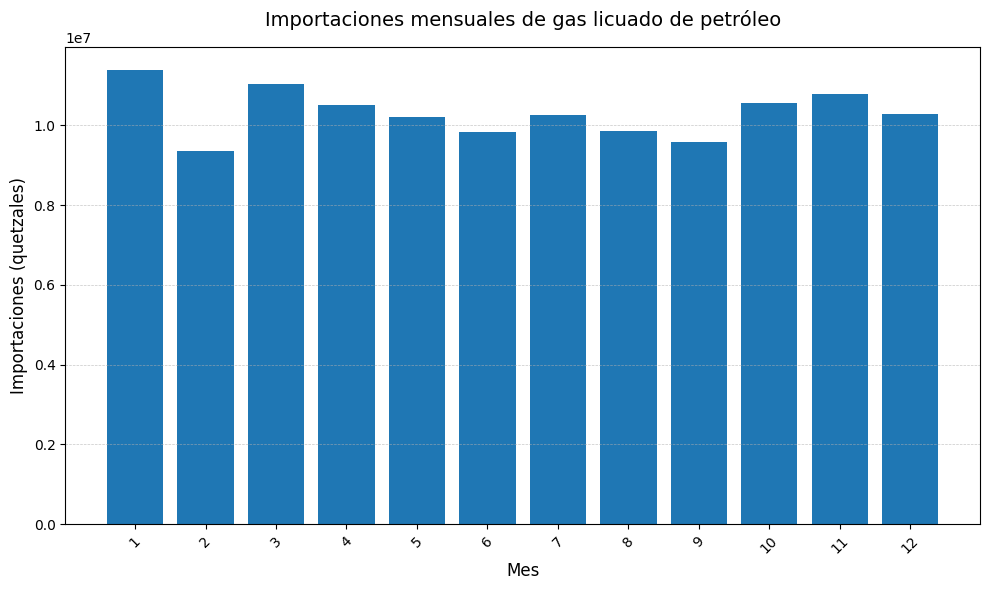

In [430]:
suma_gas_mensual_i = importaciones_grouped_monthly['gas licuado de petróleo'].sum()

graficar_barras(suma_gas_mensual_i, 'Mes', 'Importaciones (quetzales)', 'Importaciones mensuales de gas licuado de petróleo')

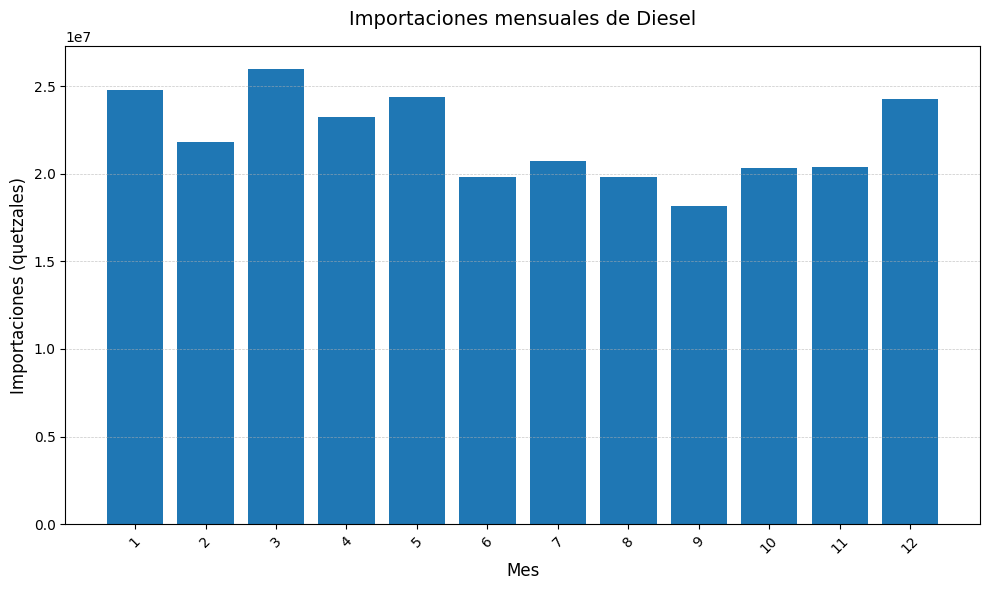

In [431]:
suma_diesel_mensual_i = importaciones_grouped_monthly['Diesel'].sum()

graficar_barras(suma_diesel_mensual_i, 'Mes', 'Importaciones (quetzales)', 'Importaciones mensuales de Diesel')

## Precios de combustibles

In [432]:
precios[['Superior', 'Regular', 'Diesel', 'Glp Cilindro 25Lbs.']].describe()
precios


FECHA Tipo de Cambio Superior Regular Diesel Bunker  \
0   2025-01-01           7.71    28.95   27.45  25.47  18.74   
1   2025-01-02           7.71    28.95   27.45  25.47  18.74   
2   2025-01-03           7.71    28.95   27.45  25.47  18.74   
3   2025-01-04           7.71    28.95   27.45  25.47  18.74   
4   2025-01-05           7.71    28.95   27.45  25.47  18.74   
..         ...            ...      ...     ...    ...    ...   
189 2025-07-09           7.67    30.98   29.49     27  18.49   
190 2025-07-10           7.68    30.98   29.49     27  18.49   
191 2025-07-11            NaN    30.98   29.49     27  18.49   
192 2025-07-12            NaN    30.98   29.49     27  18.49   
193 2025-07-13            NaN    30.98   29.49     27  18.49   

    Glp Cilindro 25Lbs. Unnamed: 7  
0                   110       4.40  
1                   110       4.40  
2                   110       4.40  
3                   110       4.40  
4                   110       4.40  
..                  ...        ...  
189                 120       4.80  
190                 120       4.80  
191                 120       4.80  
192                 120       4.80  
193                 120       4.80  

[194 rows x 8 columns]

KeyboardInterrupt: 

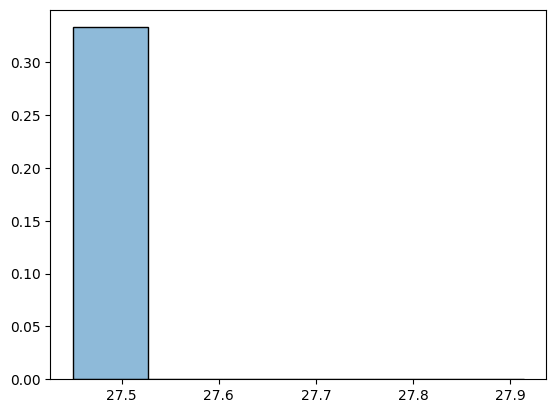

In [433]:
graficar_histogramas_boxplot(precios, "Regular", "Histograma de precios de la gasolina regular", "Boxplot de precios de Regular")

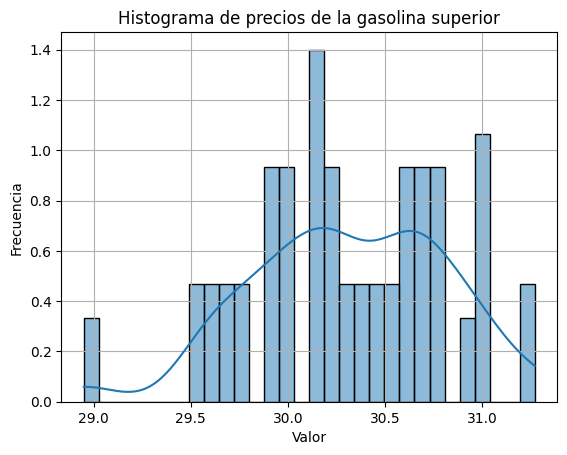

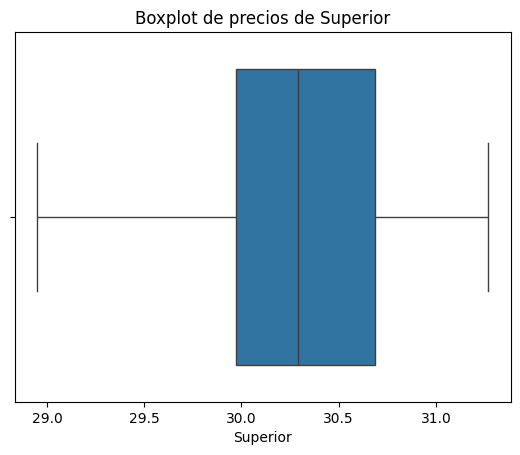

In [ ]:
graficar_histogramas_boxplot(precios, "Superior", "Histograma de precios de la gasolina superior", "Boxplot de precios de Superior")

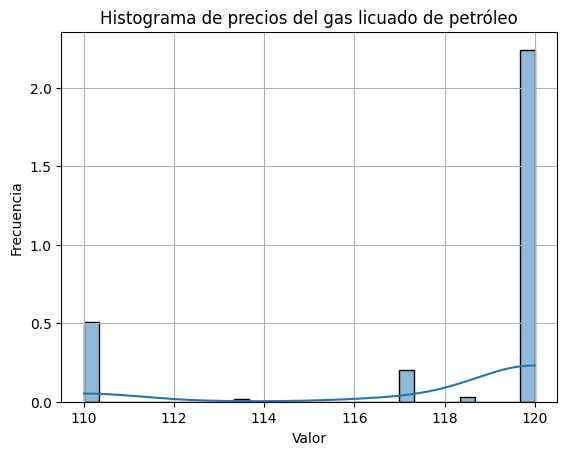

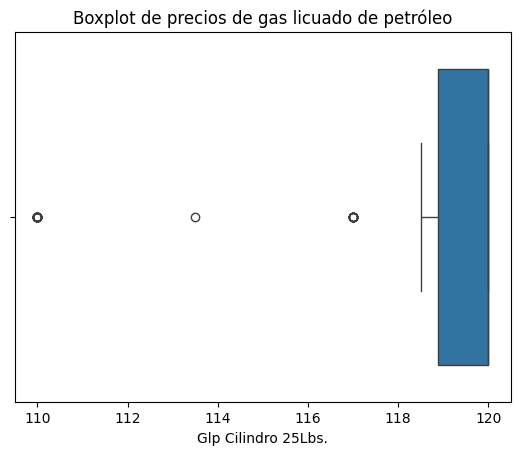

In [ ]:
graficar_histogramas_boxplot(precios, "Glp Cilindro 25Lbs.", "Histograma de precios del gas licuado de petróleo", "Boxplot de precios de gas licuado de petróleo")

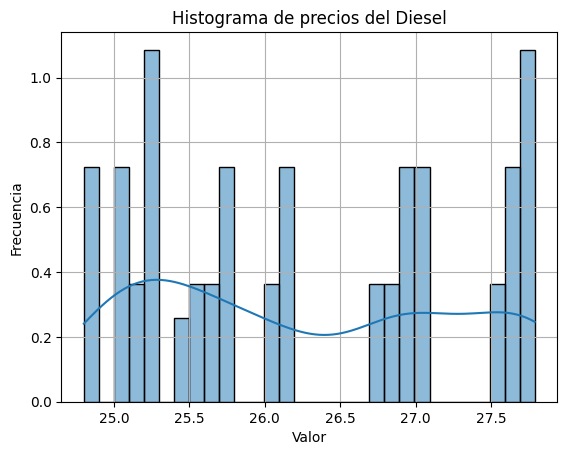

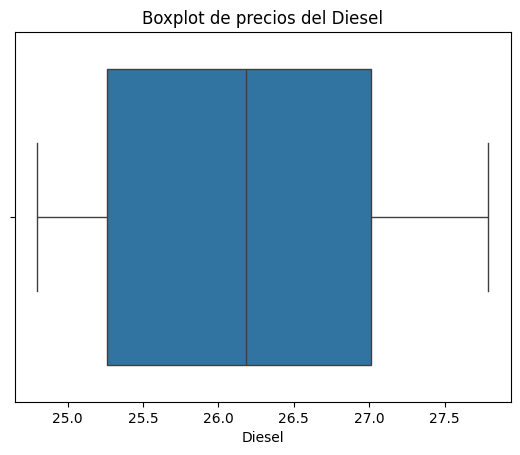

In [ ]:
graficar_histogramas_boxplot(precios, "Diesel", "Histograma de precios del Diesel", "Boxplot de precios del Diesel")

### Evolución temporal

In [ ]:
precios['fecha'] = pd.to_datetime(precios['fecha'])
precios['mes'] = precios['fecha'] .dt.month
precios_grouped = precios.groupby('mes')


avg_precios = precios_grouped['gasolina regular'].mean()

    
graficar_barras(avg_precios, 'Mes', 'Precio (quetzales)', 'Precio promedio mensual de Gasolina regular en 2025')

importaciones['mes'] = importaciones['fecha'].dt.month
importaciones_grouped_monthly = importaciones.groupby('mes')


suma_regular_mensual_i = importaciones_grouped_monthly['gasolina regular'].sum()

graficar_barras(suma_regular_mensual_i, 'Mes', 'Importaciones (quetzales)', 'Importaciones mensuales de gasolina regular')

KeyError: 'fecha'

## Analisis Series de Tiempo


## IMPORTACIONES

Primero obtenemos los datos filtrados

In [ ]:
# Asegurar que los nombres de columnas estén limpios
consumos.columns = consumos.columns.str.strip().str.lower()
importaciones['diesel'] = importaciones['Diesel']

# Seleccionar columnas específicas
columnas_deseadas = [
    'fecha',
    'gasolina superior',
    'gasolina regular',
    'gas licuado de petróleo',
    'diesel'
]

# Filtrar el DataFrame
importaciones_filtrado = importaciones[columnas_deseadas]
consumo_filtrado = consumos[columnas_deseadas]




Index(['fecha', 'gasolina superior', 'gasolina regular',
       'gas licuado de petróleo', 'diesel'],
      dtype='object')

Ahora graficamos

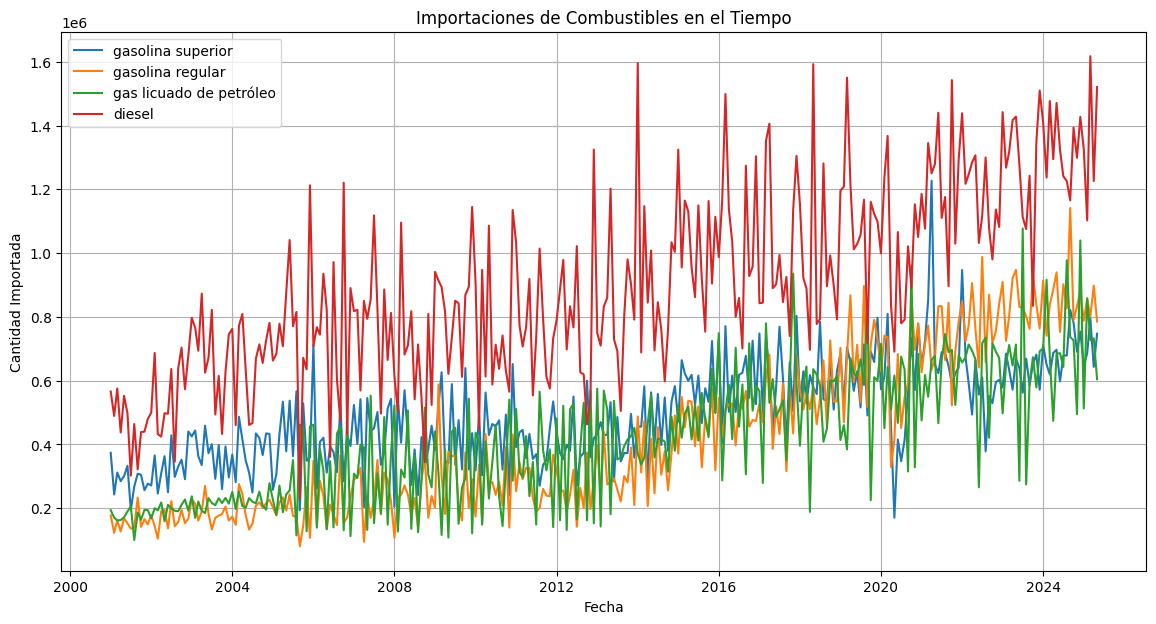

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))

for columna in columnas_deseadas[1:]:  # Excluimos 'Fecha'
    plt.plot(importaciones_filtrado['fecha'], importaciones_filtrado[columna], label=columna)

plt.title('Importaciones de Combustibles en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')
plt.legend()
plt.grid(True)
plt.show()


Obtenemos sus componentes

<Figure size 1400x1000 with 0 Axes>

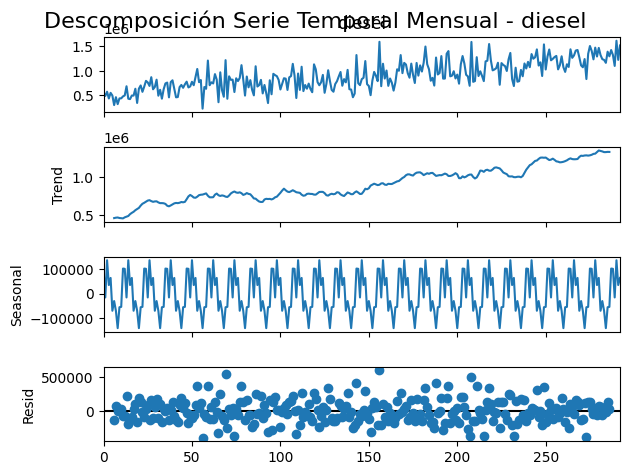

<Figure size 1400x1000 with 0 Axes>

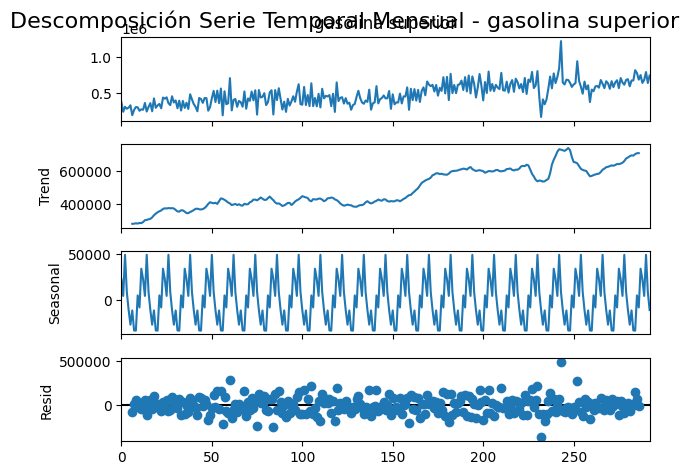

<Figure size 1400x1000 with 0 Axes>

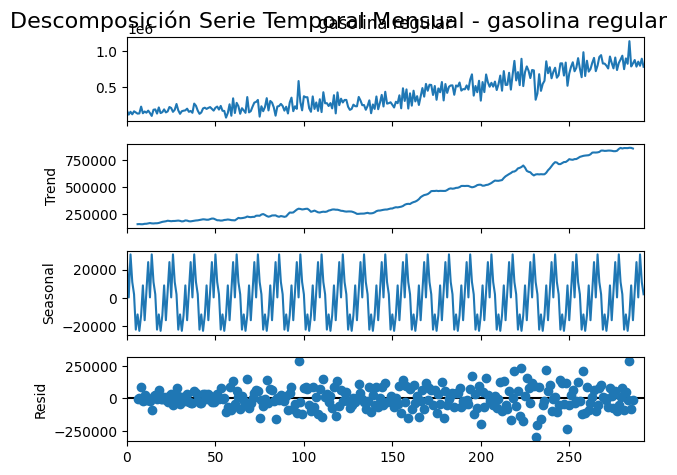

<Figure size 1400x1000 with 0 Axes>

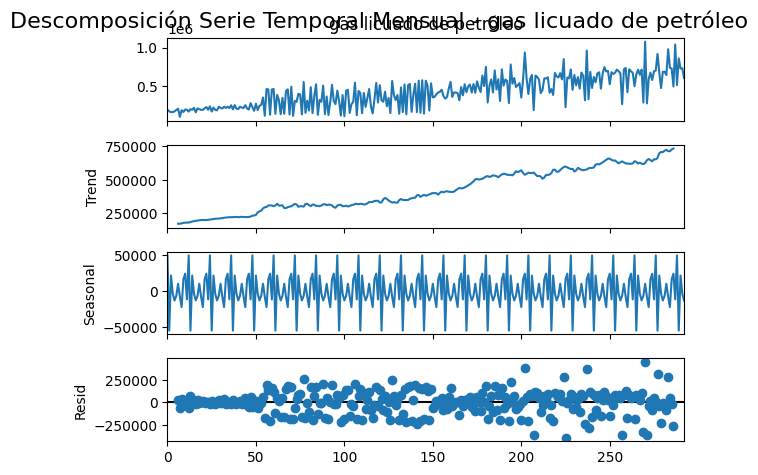

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Lista de columnas a analizar (excluyendo 'Fecha' porque ya es índice)
columnas_a_analizar = [
    'diesel',
    'gasolina superior',
    'gasolina regular',
    'gas licuado de petróleo'
]

for columna in columnas_a_analizar:
    serie = importaciones_filtrado[columna].dropna()

    # Descomposición aditiva con periodo 12 (mensual)
    resultado = seasonal_decompose(serie, model='additive', period=12)

    # Graficar
    plt.figure(figsize=(14, 10))
    resultado.plot()
    plt.suptitle(f'Descomposición Serie Temporal Mensual - {columna}', fontsize=16)
    plt.show()


### Analisis

Podemos ver que todas representan tendencia en todas , excepto por una parte en donde lo que sucede es que ocurre un valle, posiblemente debido a pandemia u otro evento . Tambien en todas podemos observar estacionalidad en todas las series, de hecho tiene una periocidad de 12 meses. Por lo que se observa en el componente de sesonal. 

## Consumo

Grafica

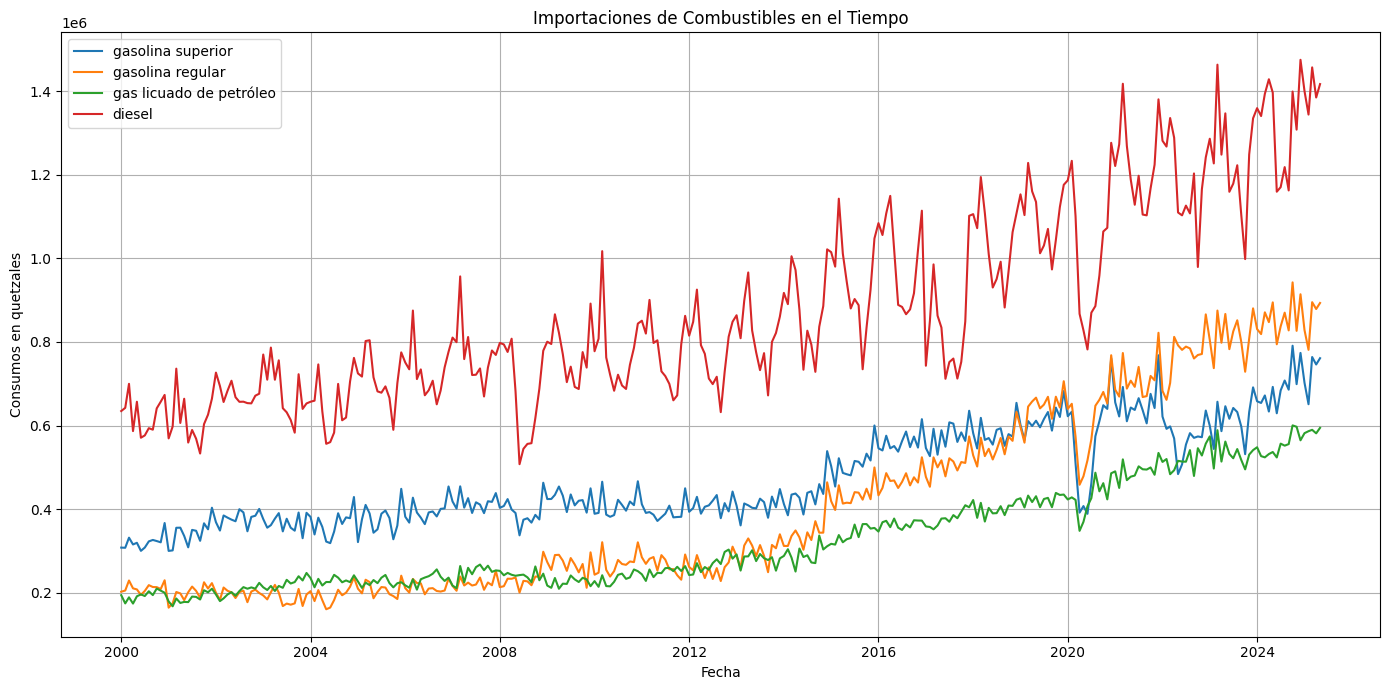

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


consumo_filtrado = consumos[
    [
    'fecha',
    'gasolina superior',
    'gasolina regular',
    'gas licuado de petróleo',
    'diesel'
]
]

plt.figure(figsize=(14, 7))
for columna in columnas_deseadas[1:]:  # Excluimos 'Fecha'
    plt.plot(consumo_filtrado['fecha'], consumo_filtrado[columna], label=columna)

plt.title('Importaciones de Combustibles en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Consumos en quetzales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Componentes

C:\Users\HP\AppData\Local\Temp\ipykernel_4540\1705425765.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_filtrado[col] = pd.to_numeric(consumo_filtrado[col], errors='coerce')


<Figure size 1400x1000 with 0 Axes>

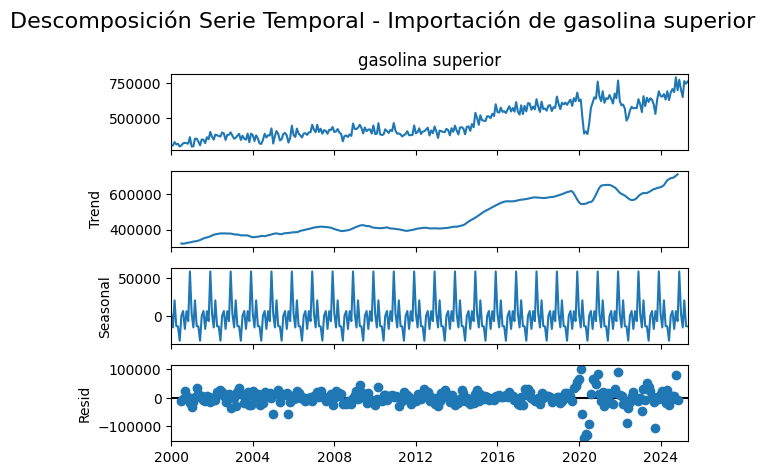

<Figure size 1400x1000 with 0 Axes>

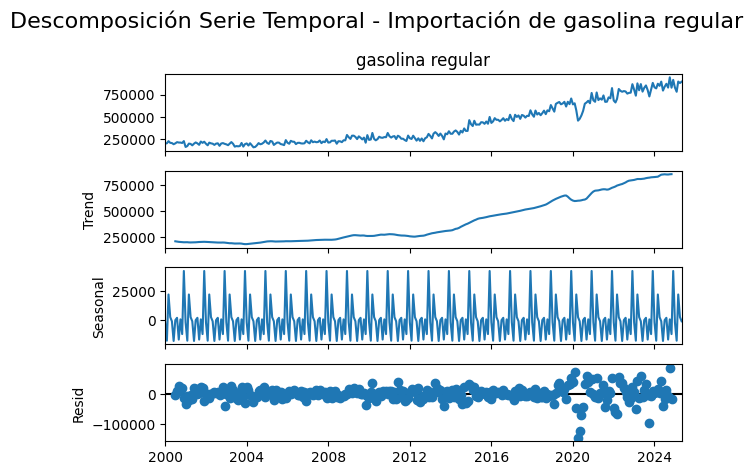

<Figure size 1400x1000 with 0 Axes>

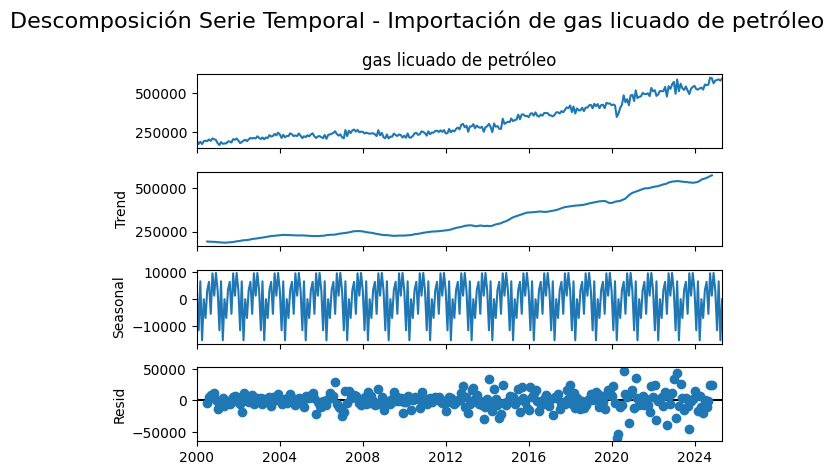

<Figure size 1400x1000 with 0 Axes>

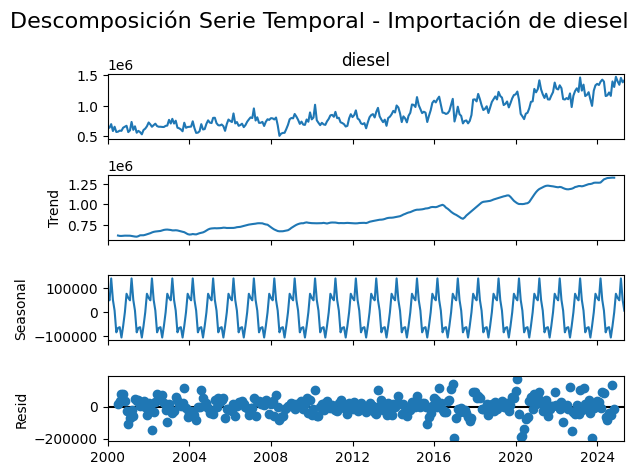

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


consumo_filtrado = consumos[
    [
    'fecha',
    'gasolina superior',
    'gasolina regular',
    'gas licuado de petróleo',
    'diesel'
]
]


# Establecer Fecha como índice temporal
consumo_filtrado.set_index('fecha', inplace=True)

# Convertir a numérico cada columna por si acaso
for col in columnas_deseadas[1:]:
    consumo_filtrado[col] = pd.to_numeric(consumo_filtrado[col], errors='coerce')

# Descomposición y gráfica para cada combustible
for columna in columnas_deseadas[1:]:
    serie = consumo_filtrado[columna].dropna()

    if len(serie) >= 24:  # Al menos 2 años de datos para seasonal_decompose con period=12
        resultado = seasonal_decompose(serie, model='additive', period=12)

        plt.figure(figsize=(14, 10))
        resultado.plot()
        plt.suptitle(f'Descomposición Serie Temporal - Importación de {columna}', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"[❗] No hay suficientes datos para descomponer la serie: {columna}")


## Analisis

Hemos observado un aumento general en el consumo de todos los combustibles a lo largo del período analizado, lo cual refleja una tendencia creciente sostenida en la demanda energética del país. Esta tendencia puede estar relacionada con una mayor actividad económica, crecimiento del parque vehicular o estacionalidades propias del mercado.

No obstante se destaca una cosa , y es que en todas las series analizadas. un valle en 2020 debido a la pandemia que ocurrio.

Ademas en dodas se puede ver sierta estacionalidad , lo que indica tendencias siempre en el mercado de estar consumiendo el producto

## Precio

Grafica

In [ ]:
precios.keys()

precios_filtrado = precios
precios_filtrado['fecha'] = precios_filtrado['FECHA']
precios_filtrado['gas licuado'] = precios_filtrado['Glp Cilindro 25Lbs.']

data_precios = [
  'fecha',
  'Superior',
  'Regular',
  'Diesel',
  'gas licuado'
]
precios_filtrado = precios_filtrado[data_precios]



Componentes

C:\Users\HP\AppData\Local\Temp\ipykernel_4540\2384651905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precios_filtrado[col] = pd.to_numeric(precios_filtrado[col], errors='coerce')


<Figure size 1400x1000 with 0 Axes>

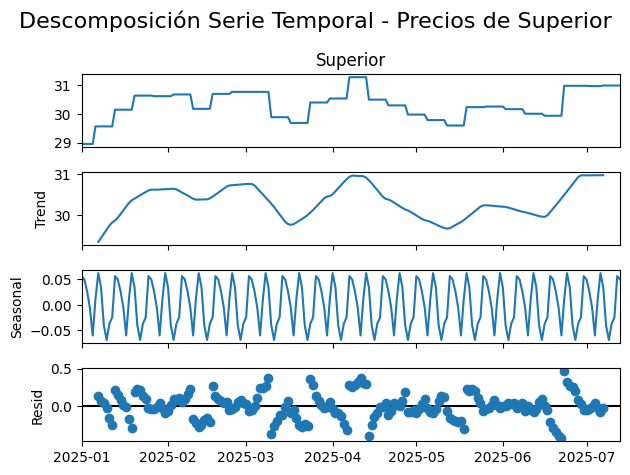

<Figure size 1400x1000 with 0 Axes>

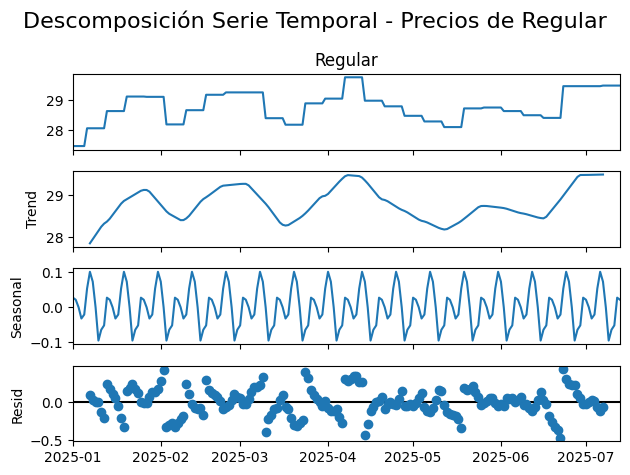

<Figure size 1400x1000 with 0 Axes>

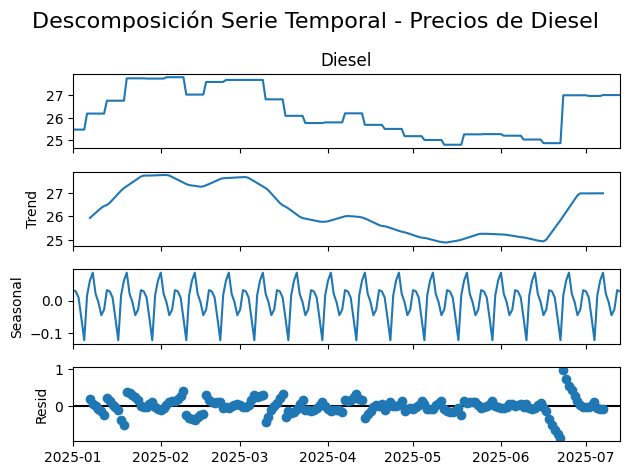

<Figure size 1400x1000 with 0 Axes>

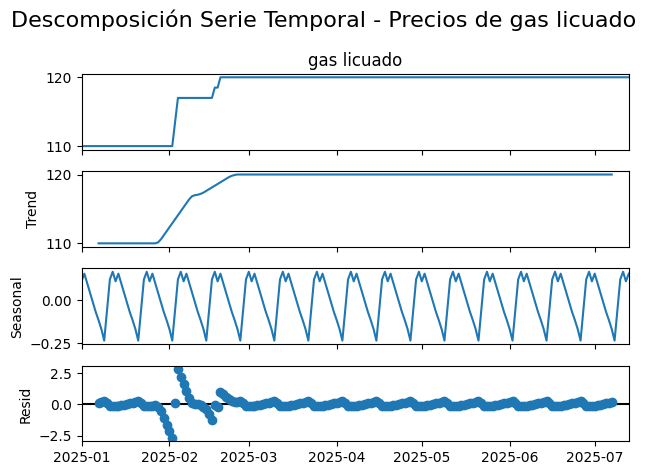

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose





# Establecer Fecha como índice temporal
precios_filtrado.set_index('fecha', inplace=True)

# Convertir a numérico cada columna por si acaso
for col in data_precios[1:]:
    precios_filtrado[col] = pd.to_numeric(precios_filtrado[col], errors='coerce')

# Descomposición y gráfica para cada combustible
for columna in data_precios[1:]:
    serie = precios_filtrado[columna].dropna()

    if len(serie) >= 24:  # Al menos 2 años de datos para seasonal_decompose con period=12
        resultado = seasonal_decompose(serie, model='additive', period=12)

        plt.figure(figsize=(14, 10))
        resultado.plot()
        plt.suptitle(f'Descomposición Serie Temporal - Precios de {columna}', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"[❗] No hay suficientes datos para descomponer la serie: {columna}")


## Analisis

Analizando todos los componentes podemos ver que hay estacionalidad, y con respecto a la tendencia esta varia mucho , en el gas licuado del hogar si hay una tendencia muy grande desde inicios del año pero se ha ido normalizando conforme el tiempo. 

Con respecto a los precios de los demas realmente no hay una tendencia clara , y se puede observar que si hay una periocidad , lo cual indica que los precios tienden a seguir un patron no una tendencia de su aumento, talvez con una serie mas larga podria verse ese aumento

# ESTACIONARIEDAD


## Analisis


Esta funcion nos ayudara por cada serie analizar si es estacionaria en media y varianza


In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

def analizar_series_combustibles(df, columnas_deseadas, ventana_varianza=12):
    """
    Función para analizar varianza y estacionariedad de series temporales de combustibles
      debes pasarle el df que es la serie con index fecha y las columnas deseadas
    """
    
    # Configurar estilo de gráficos
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    def calcular_varianza_movil(serie, ventana=12):
        """Calcula la varianza móvil de una serie temporal"""
        return serie.rolling(window=ventana, center=True).var()

    def prueba_adf(serie, nombre_serie):
        """Realiza la prueba Augmented Dickey-Fuller"""
        resultado = adfuller(serie.dropna(), autolag='AIC')
        
        print(f"\n{'='*50}")
        print(f"PRUEBA AUGMENTED DICKEY-FULLER - {nombre_serie.upper()}")
        print(f"{'='*50}")
        print(f"Estadístico ADF: {resultado[0]:.4f}")
        print(f"P-valor: {resultado[1]:.4f}")
        print(f"Número de lags utilizados: {resultado[2]}")
        print(f"Número de observaciones: {resultado[3]}")
        print(f"Valores críticos:")
        for clave, valor in resultado[4].items():
            print(f"\t{clave}: {valor:.4f}")
        
        # Interpretación
        if resultado[1] <= 0.05:
            print(f"\n✅ RESULTADO: La serie ES ESTACIONARIA (p-valor = {resultado[1]:.4f} ≤ 0.05)")
            print("   Se rechaza la hipótesis nula de raíz unitaria")
            es_estacionaria = True
        else:
            print(f"\n❌ RESULTADO: La serie NO ES ESTACIONARIA (p-valor = {resultado[1]:.4f} > 0.05)")
            print("   No se puede rechazar la hipótesis nula de raíz unitaria")
            es_estacionaria = False
        
        return resultado, es_estacionaria

    def prueba_kpss(serie, nombre_serie):
        """Realiza la prueba KPSS como complemento"""
        resultado = kpss(serie.dropna(), regression='c', nlags='auto')
        
        print(f"\n{'='*50}")
        print(f"PRUEBA KPSS - {nombre_serie.upper()}")
        print(f"{'='*50}")
        print(f"Estadístico KPSS: {resultado[0]:.4f}")
        print(f"P-valor: {resultado[1]:.4f}")
        print(f"Número de lags: {resultado[2]}")
        print(f"Valores críticos:")
        for clave, valor in resultado[3].items():
            print(f"\t{clave}: {valor:.4f}")
        
        # Interpretación (KPSS tiene hipótesis nula opuesta a ADF)
        if resultado[1] <= 0.05:
            print(f"\n❌ RESULTADO KPSS: La serie NO ES ESTACIONARIA (p-valor = {resultado[1]:.4f} ≤ 0.05)")
            print("   Se rechaza la hipótesis nula de estacionariedad")
            es_estacionaria = False
        else:
            print(f"\n✅ RESULTADO KPSS: La serie ES ESTACIONARIA (p-valor = {resultado[1]:.4f} > 0.05)")
            print("   No se puede rechazar la hipótesis nula de estacionariedad")
            es_estacionaria = True
        
        return resultado, es_estacionaria

    # Convertir a numérico cada columna
    df_work = df.copy()
    for col in columnas_deseadas:
        df_work[col] = pd.to_numeric(df_work[col], errors='coerce')
    
    # Diccionario para almacenar resultados
    resultados_pruebas = {}
    
    # Análisis para cada combustible
    for columna in columnas_deseadas:
        serie = df_work[columna].dropna()
        
        if len(serie) >= 12:  # Al menos 1 año de datos
            print(f"\n🔍 ANALIZANDO: {columna.upper()}")
            print("="*60)
            
            # Calcular varianza móvil
            varianza_movil = calcular_varianza_movil(serie, ventana=ventana_varianza)
            
            # GRÁFICO DE LA SERIE CON VARIANZA SUPERPUESTA
            fig, ax1 = plt.subplots(figsize=(15, 8))
            
            # Serie original en el eje izquierdo
            color_serie = 'tab:blue'
            ax1.set_xlabel('Fecha', fontsize=12)
            ax1.set_ylabel('Consumo', color=color_serie, fontsize=12)
            line1 = ax1.plot(serie.index, serie.values, linewidth=2, color=color_serie, 
                           label=f'{columna}', alpha=0.8)
            ax1.tick_params(axis='y', labelcolor=color_serie)
            ax1.grid(True, alpha=0.3)
            
            # Varianza móvil en el eje derecho
            ax2 = ax1.twinx()
            color_varianza = 'tab:red'
            ax2.set_ylabel('Varianza Móvil', color=color_varianza, fontsize=12)
            line2 = ax2.plot(varianza_movil.index, varianza_movil.values, 
                           linewidth=2, color=color_varianza, linestyle='--',
                           label=f'Varianza móvil ({ventana_varianza} períodos)', alpha=0.7)
            ax2.tick_params(axis='y', labelcolor=color_varianza)
            
            # Título y leyenda
            plt.title(f'Serie Temporal y Varianza Móvil - {columna}', 
                     fontsize=14, fontweight='bold', pad=20)
            
            # Combinar leyendas
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
            
            plt.tight_layout()
            plt.show()
            
            # Gráfico adicional solo de la varianza para mejor análisis
            plt.figure(figsize=(15, 5))
            plt.plot(varianza_movil.index, varianza_movil.values, 
                    linewidth=2, color='red', label=f'Varianza móvil ({ventana_varianza} períodos)')
            plt.fill_between(varianza_movil.index, varianza_movil.values, alpha=0.3, color='red')
            plt.title(f'Evolución de la Varianza Móvil - {columna}', fontsize=14, fontweight='bold')
            plt.ylabel('Varianza')
            plt.xlabel('Fecha')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # PRUEBAS DE ESTACIONARIEDAD
            resultado_adf, est_adf = prueba_adf(serie, columna)
            resultado_kpss, est_kpss = prueba_kpss(serie, columna)
            
            # Guardar resultados
            resultados_pruebas[columna] = {
                'ADF_estadistico': resultado_adf[0],
                'ADF_pvalor': resultado_adf[1],
                'ADF_estacionaria': est_adf,
                'KPSS_estadistico': resultado_kpss[0],
                'KPSS_pvalor': resultado_kpss[1],
                'KPSS_estacionaria': est_kpss,
                'Consenso_estacionaria': est_adf and est_kpss
            }
            
            print(f"\n{'='*60}")
            
        else:
            print(f"[❗] No hay suficientes datos para analizar la serie: {columna}")
            resultados_pruebas[columna] = None

    # RESUMEN ESTADÍSTICO DE TODAS LAS SERIES
    print("\n" + "="*80)
    print("RESUMEN ESTADÍSTICO - TODAS LAS SERIES")
    print("="*80)

    resumen_estadistico = pd.DataFrame()
    for columna in columnas_deseadas:
        serie = df_work[columna].dropna()
        if len(serie) > 0:
            stats = {
                'Media': serie.mean(),
                'Mediana': serie.median(),
                'Desv. Estándar': serie.std(),
                'Varianza': serie.var(),
                'CV (%)': (serie.std() / serie.mean()) * 100,  # Coeficiente de variación
                'Min': serie.min(),
                'Max': serie.max(),
                'Observaciones': len(serie)
            }
            resumen_estadistico[columna] = stats

    print(resumen_estadistico.round(4))
    
    # RESUMEN DE PRUEBAS DE ESTACIONARIEDAD
    print("\n" + "="*80)
    print("RESUMEN DE PRUEBAS DE ESTACIONARIEDAD")
    print("="*80)
    
    resumen_estacionariedad = pd.DataFrame()
    for columna, resultados in resultados_pruebas.items():
        if resultados is not None:
            resumen_estacionariedad[columna] = {
                'ADF p-valor': resultados['ADF_pvalor'],
                'KPSS p-valor': resultados['KPSS_pvalor'],
                'ADF Estacionaria': '✅' if resultados['ADF_estacionaria'] else '❌',
                'KPSS Estacionaria': '✅' if resultados['KPSS_estacionaria'] else '❌',
                'Consenso': '✅' if resultados['Consenso_estacionaria'] else '❌'
            }
    
    if len(resumen_estacionariedad.columns) > 0:
        print(resumen_estacionariedad.T)
    
    return resultados_pruebas



## Transformaciones

Estas funciones transorman la serie hasta encontrar aquella que sea estacionaria

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

def transformacion_logaritmica(df, columnas_deseadas, ventana_varianza=12):
   
    
    def calcular_varianza_movil(serie, ventana=12):
        """Calcula la varianza móvil de una serie temporal"""
        return serie.rolling(window=ventana, center=True).var()
    
   
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
   
    df_log = df.copy()
    
    for columna in columnas_deseadas:
        serie_original = df[columna].dropna()
        
        if len(serie_original) >= 12:
            print(f"\n🔄 TRANSFORMACIÓN LOGARÍTMICA: {columna.upper()}")
            print("="*70)
            
            # Verificar que no hay valores negativos o cero
            if (serie_original <= 0).any():
                print(f"⚠️  ADVERTENCIA: La serie {columna} tiene valores ≤ 0")
                print("   Aplicando corrección: ln(x + 1) en lugar de ln(x)")
                serie_log = np.log1p(serie_original)  # ln(x + 1)
                df_log[columna] = serie_log
            else:
                serie_log = np.log(serie_original)
                df_log[columna] = serie_log
            
            # Calcular varianzas móviles
            var_original = calcular_varianza_movil(serie_original, ventana_varianza)
            var_log = calcular_varianza_movil(serie_log, ventana_varianza)
            
            # GRÁFICO COMPARATIVO: ANTES Y DESPUÉS
            fig, axes = plt.subplots(2, 2, figsize=(16, 10))
            
            # Serie original
            axes[0, 0].plot(serie_original.index, serie_original.values, 
                           linewidth=2, color='blue', label='Serie Original')
            axes[0, 0].set_title(f'Serie Original - {columna}', fontweight='bold')
            axes[0, 0].set_ylabel('Valor')
            axes[0, 0].legend()
            axes[0, 0].grid(True, alpha=0.3)
            
            # Serie transformada
            axes[0, 1].plot(serie_log.index, serie_log.values, 
                           linewidth=2, color='green', label='Serie Log-transformada')
            axes[0, 1].set_title(f'Serie Log-transformada - {columna}', fontweight='bold')
            axes[0, 1].set_ylabel('ln(Valor)')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)
            
            # Varianza original
            axes[1, 0].plot(var_original.index, var_original.values, 
                           linewidth=2, color='red', label=f'Varianza Original (ventana={ventana_varianza})')
            axes[1, 0].fill_between(var_original.index, var_original.values, alpha=0.3, color='red')
            axes[1, 0].set_title(f'Varianza Móvil Original - {columna}', fontweight='bold')
            axes[1, 0].set_ylabel('Varianza')
            axes[1, 0].set_xlabel('Fecha')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)
            
            # Varianza transformada
            axes[1, 1].plot(var_log.index, var_log.values, 
                           linewidth=2, color='orange', label=f'Varianza Log-transformada (ventana={ventana_varianza})')
            axes[1, 1].fill_between(var_log.index, var_log.values, alpha=0.3, color='orange')
            axes[1, 1].set_title(f'Varianza Móvil Log-transformada - {columna}', fontweight='bold')
            axes[1, 1].set_ylabel('Varianza')
            axes[1, 1].set_xlabel('Fecha')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
            
            plt.suptitle(f'Comparación: Original vs Log-transformada - {columna}', 
                        fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            # ESTADÍSTICAS COMPARATIVAS
            print(f"\n📊 ESTADÍSTICAS COMPARATIVAS:")
            print(f"{'Métrica':<25} {'Original':<15} {'Log-transformada':<15} {'Mejora':<10}")
            print("-" * 70)
            
            cv_original = (serie_original.std() / serie_original.mean()) * 100
            cv_log = (serie_log.std() / serie_log.mean()) * 100
            mejora_cv = ((cv_original - cv_log) / cv_original) * 100
            
            var_original_media = var_original.mean()
            var_log_media = var_log.mean()
            mejora_var = ((var_original_media - var_log_media) / var_original_media) * 100
            
            print(f"{'Coef. Variación (%)':<25} {cv_original:<15.4f} {cv_log:<15.4f} {mejora_cv:<10.2f}%")
            print(f"{'Varianza Media':<25} {var_original_media:<15.4f} {var_log_media:<15.4f} {mejora_var:<10.2f}%")
            print(f"{'Desv. Estándar':<25} {serie_original.std():<15.4f} {serie_log.std():<15.4f}")
            
            # EVALUACIÓN DE LA TRANSFORMACIÓN
            if mejora_cv > 0:
                print(f"\n✅ RESULTADO: La transformación logarítmica MEJORÓ la estabilidad de varianza")
                print(f"   Reducción del coeficiente de variación: {mejora_cv:.2f}%")
            else:
                print(f"\n⚠️  RESULTADO: La transformación logarítmica NO mejoró significativamente la varianza")
                print(f"   Cambio en coeficiente de variación: {mejora_cv:.2f}%")
        
        else:
            print(f"[❗] No hay suficientes datos para transformar la serie: {columna}")
    
    return df_log


def diferenciacion_series(df, columnas_deseadas, max_diferencias=3):
    
    
    def prueba_adf_simple(serie):
        """Versión simplificada de la prueba ADF"""
        try:
            resultado = adfuller(serie.dropna(), autolag='AIC')
            return resultado[1], resultado[1] <= 0.05  # p-valor, es_estacionaria
        except:
            return 1.0, False
    
    def prueba_kpss_simple(serie):
        """Versión simplificada de la prueba KPSS"""
        try:
            resultado = kpss(serie.dropna(), regression='c', nlags='auto')
            return resultado[1], resultado[1] > 0.05  # p-valor, es_estacionaria
        except:
            return 0.0, False
    
    # Configurar estilo de gráficos
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    resultados_diferenciacion = {}
    
    for columna in columnas_deseadas:
        serie_original = df[columna].dropna()
        
        if len(serie_original) >= 12:
            print(f"\n🔍 DIFERENCIACIÓN ITERATIVA: {columna.upper()}")
            print("="*70)
            
            series_diferenciadas = {'0': serie_original}  # Serie original
            resultados_pruebas = {}
            
            # Probar serie original
            adf_pval, adf_est = prueba_adf_simple(serie_original)
            kpss_pval, kpss_est = prueba_kpss_simple(serie_original)
            
            resultados_pruebas['0'] = {
                'adf_pvalor': adf_pval,
                'adf_estacionaria': adf_est,
                'kpss_pvalor': kpss_pval,
                'kpss_estacionaria': kpss_est,
                'consenso': adf_est and kpss_est
            }
            
            # Aplicar diferenciaciones sucesivas
            serie_actual = serie_original.copy()
            
            for d in range(1, max_diferencias + 1):
                serie_actual = serie_actual.diff().dropna()
                
                if len(serie_actual) < 10:  # Muy pocos datos
                    print(f"⚠️  Muy pocos datos después de {d} diferenciaciones")
                    break
                
                series_diferenciadas[str(d)] = serie_actual.copy()
                
                # Probar estacionariedad
                adf_pval, adf_est = prueba_adf_simple(serie_actual)
                kpss_pval, kpss_est = prueba_kpss_simple(serie_actual)
                
                resultados_pruebas[str(d)] = {
                    'adf_pvalor': adf_pval,
                    'adf_estacionaria': adf_est,
                    'kpss_pvalor': kpss_pval,
                    'kpss_estacionaria': kpss_est,
                    'consenso': adf_est and kpss_est
                }
            
            # CREAR GRÁFICOS COMPARATIVOS
            n_series = len(series_diferenciadas)
            fig, axes = plt.subplots(n_series, 1, figsize=(15, 4 * n_series))
            
            if n_series == 1:
                axes = [axes]
            
            colores = ['blue', 'green', 'red', 'purple']
            
            for i, (orden, serie) in enumerate(series_diferenciadas.items()):
                resultado = resultados_pruebas[orden]
                
                # Determinar color según estacionariedad
                if resultado['consenso']:
                    color = 'green'
                    titulo_extra = " ✅ ESTACIONARIA"
                elif resultado['adf_estacionaria'] or resultado['kpss_estacionaria']:
                    color = 'orange'
                    titulo_extra = " ⚠️ PARCIALMENTE ESTACIONARIA"
                else:
                    color = 'red'
                    titulo_extra = " ❌ NO ESTACIONARIA"
                
                axes[i].plot(serie.index, serie.values, linewidth=2, color=color)
                
                if orden == '0':
                    titulo = f'Serie Original - {columna}{titulo_extra}'
                else:
                    titulo = f'Serie con {orden} diferenciación(es) - {columna}{titulo_extra}'
                
                axes[i].set_title(titulo, fontweight='bold')
                axes[i].set_ylabel('Valor')
                axes[i].grid(True, alpha=0.3)
                
                # Añadir información de las pruebas
                info_text = f"ADF p-val: {resultado['adf_pvalor']:.4f} | KPSS p-val: {resultado['kpss_pvalor']:.4f}"
                axes[i].text(0.02, 0.98, info_text, transform=axes[i].transAxes, 
                           fontsize=10, verticalalignment='top', 
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            axes[-1].set_xlabel('Fecha')
            plt.tight_layout()
            plt.show()
            
            # TABLA RESUMEN
            print(f"\n📋 RESUMEN DE DIFERENCIACIONES:")
            print(f"{'Orden':<8} {'ADF p-val':<12} {'ADF Est.':<10} {'KPSS p-val':<12} {'KPSS Est.':<10} {'Consenso':<10}")
            print("-" * 70)
            
            for orden, resultado in resultados_pruebas.items():
                adf_symbol = '✅' if resultado['adf_estacionaria'] else '❌'
                kpss_symbol = '✅' if resultado['kpss_estacionaria'] else '❌'
                consenso_symbol = '✅' if resultado['consenso'] else '❌'
                
                print(f"{orden:<8} {resultado['adf_pvalor']:<12.4f} {adf_symbol:<10} "
                      f"{resultado['kpss_pvalor']:<12.4f} {kpss_symbol:<10} {consenso_symbol:<10}")
            
            # RECOMENDACIÓN
            print(f"\n💡 RECOMENDACIÓN:")
            for orden, resultado in resultados_pruebas.items():
                if resultado['consenso']:
                    if orden == '0':
                        print(f"   ✅ La serie original YA ES ESTACIONARIA")
                    else:
                        print(f"   ✅ Usar {orden} diferenciación(es) para lograr estacionariedad")
                    break
            else:
                # Si no hay consenso, buscar la mejor opción
                mejor_opcion = min(resultados_pruebas.items(), 
                                 key=lambda x: (not x[1]['adf_estacionaria'], x[1]['adf_pvalor']))
                print(f"   ⚠️  No hay consenso completo. Mejor opción: {mejor_opcion[0]} diferenciación(es)")
                print(f"      (ADF p-valor: {mejor_opcion[1]['adf_pvalor']:.4f})")
            
            resultados_diferenciacion[columna] = {
                'series': series_diferenciadas,
                'pruebas': resultados_pruebas
            }
        
        else:
            print(f"[❗] No hay suficientes datos para diferenciar la serie: {columna}")
    
    return resultados_diferenciacion

### Analisis Estacionariedad de Consumo


🔍 ANALIZANDO: GASOLINA SUPERIOR


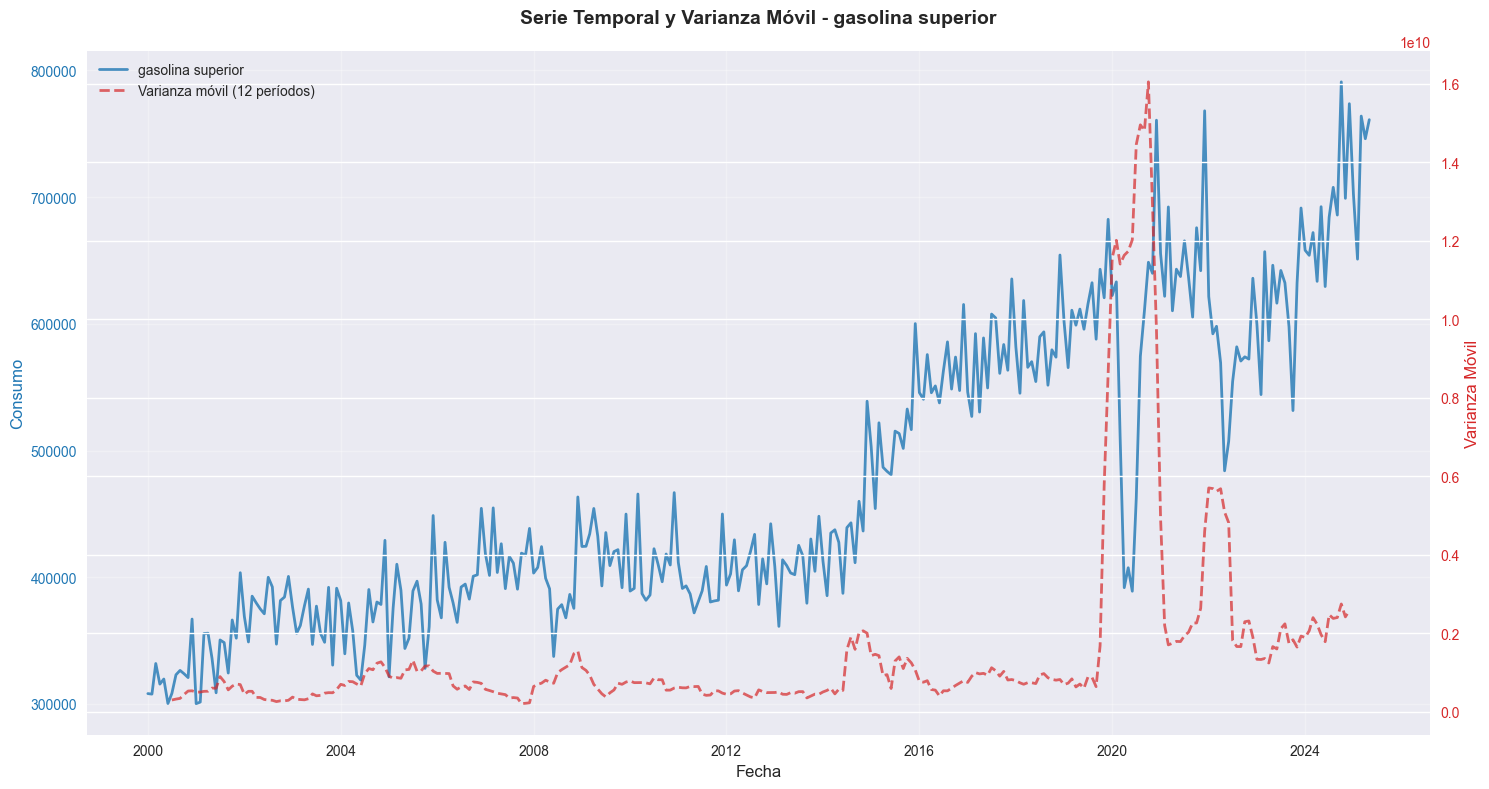

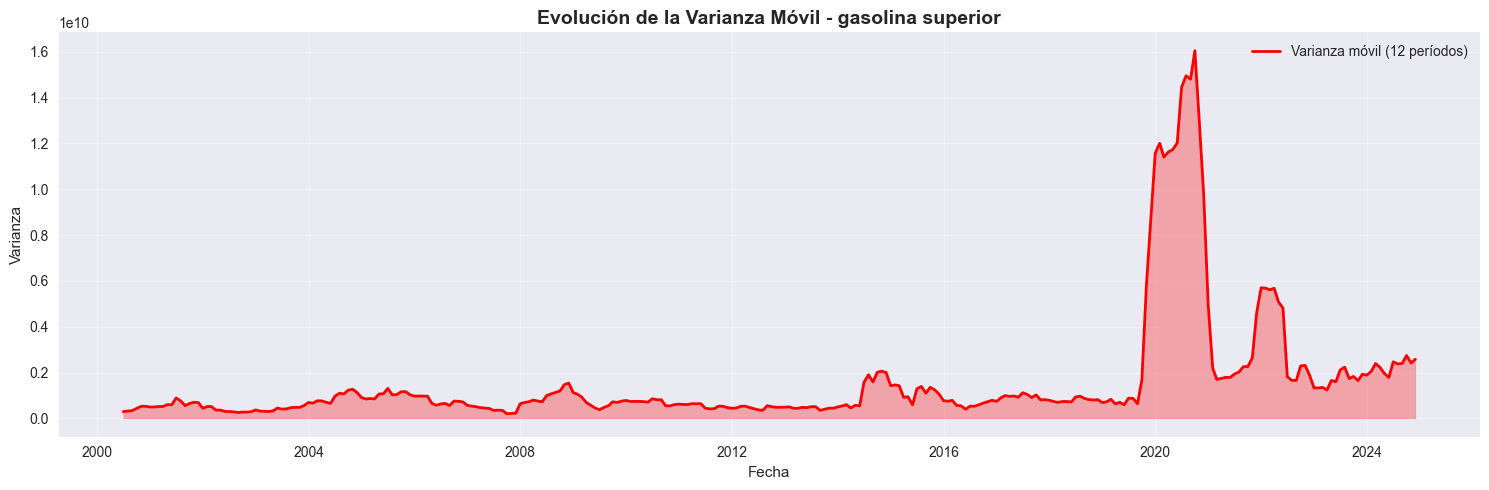


PRUEBA AUGMENTED DICKEY-FULLER - GASOLINA SUPERIOR
Estadístico ADF: -0.0291
P-valor: 0.9561
Número de lags utilizados: 12
Número de observaciones: 292
Valores críticos:
	1%: -3.4529
	5%: -2.8715
	10%: -2.5721

❌ RESULTADO: La serie NO ES ESTACIONARIA (p-valor = 0.9561 > 0.05)
   No se puede rechazar la hipótesis nula de raíz unitaria

PRUEBA KPSS - GASOLINA SUPERIOR
Estadístico KPSS: 2.6058
P-valor: 0.0100
Número de lags: 10
Valores críticos:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

❌ RESULTADO KPSS: La serie NO ES ESTACIONARIA (p-valor = 0.0100 ≤ 0.05)
   Se rechaza la hipótesis nula de estacionariedad


🔍 ANALIZANDO: GASOLINA REGULAR


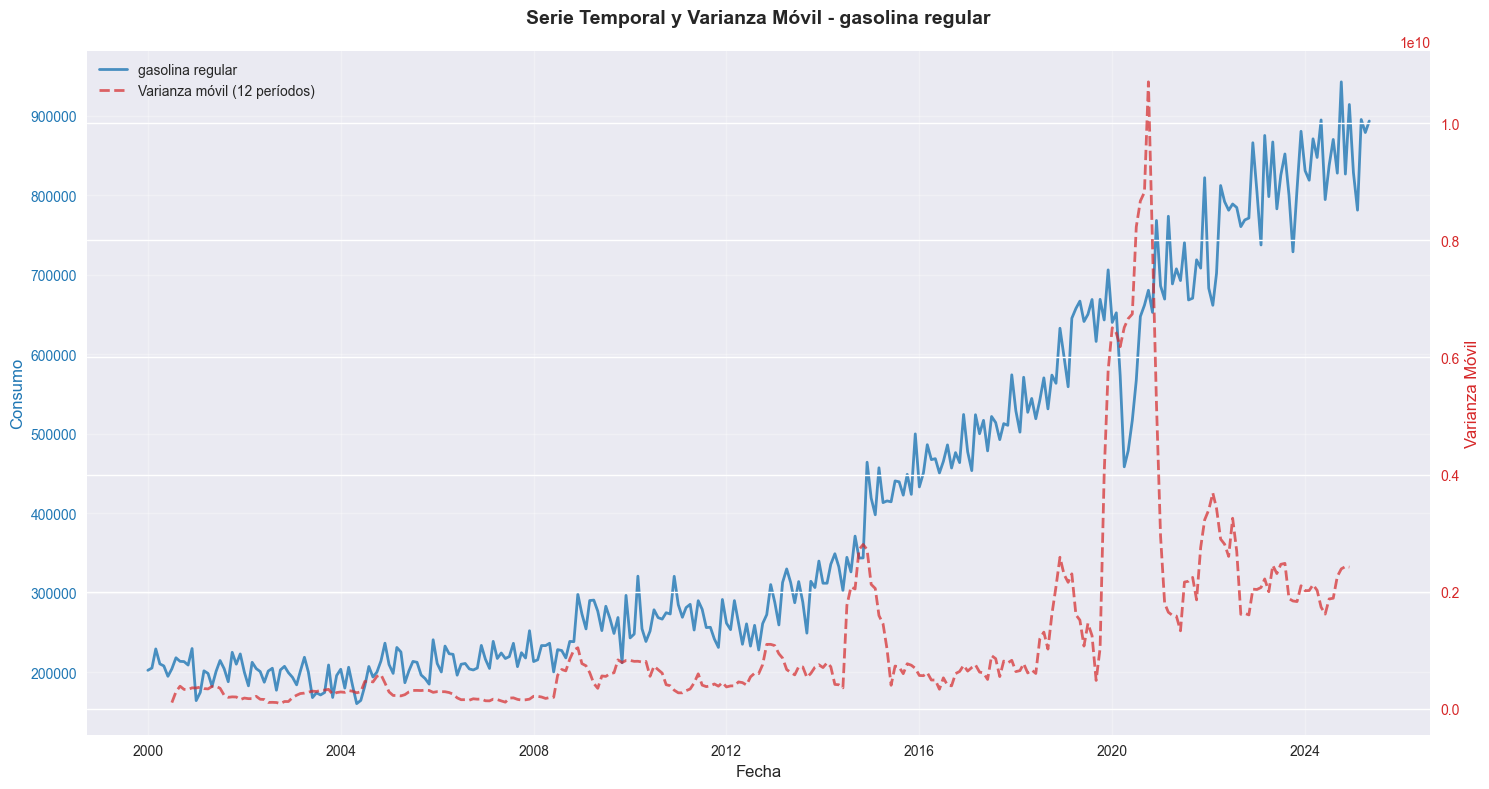

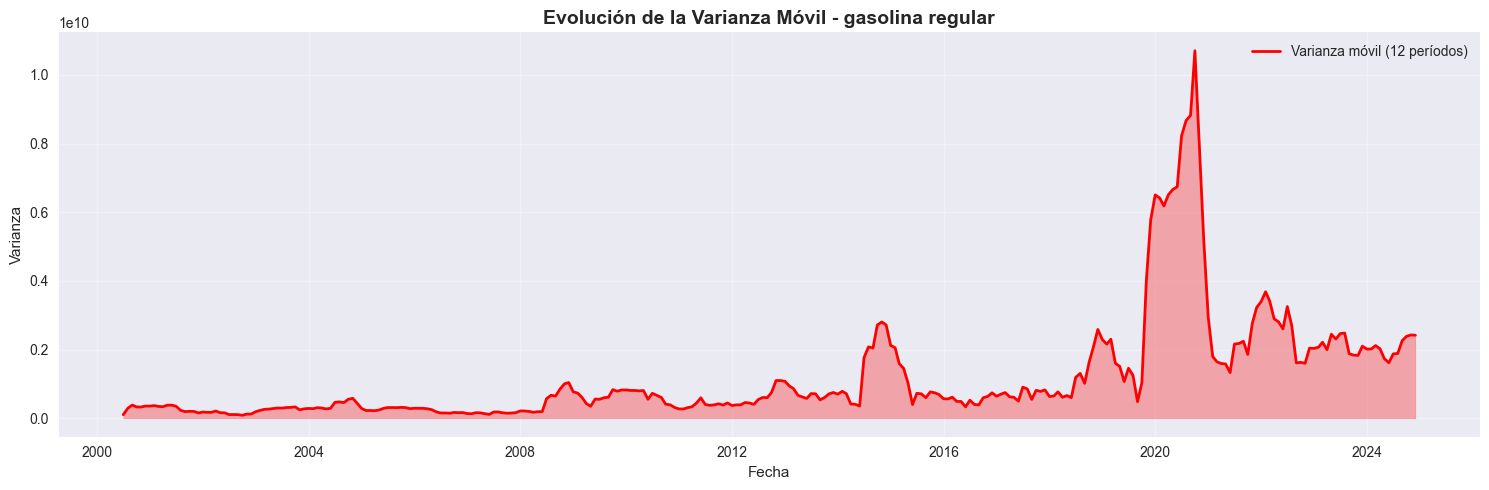


PRUEBA AUGMENTED DICKEY-FULLER - GASOLINA REGULAR
Estadístico ADF: 2.2922
P-valor: 0.9990
Número de lags utilizados: 14
Número de observaciones: 290
Valores críticos:
	1%: -3.4531
	5%: -2.8716
	10%: -2.5721

❌ RESULTADO: La serie NO ES ESTACIONARIA (p-valor = 0.9990 > 0.05)
   No se puede rechazar la hipótesis nula de raíz unitaria

PRUEBA KPSS - GASOLINA REGULAR
Estadístico KPSS: 2.5959
P-valor: 0.0100
Número de lags: 10
Valores críticos:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

❌ RESULTADO KPSS: La serie NO ES ESTACIONARIA (p-valor = 0.0100 ≤ 0.05)
   Se rechaza la hipótesis nula de estacionariedad


🔍 ANALIZANDO: GAS LICUADO DE PETRÓLEO


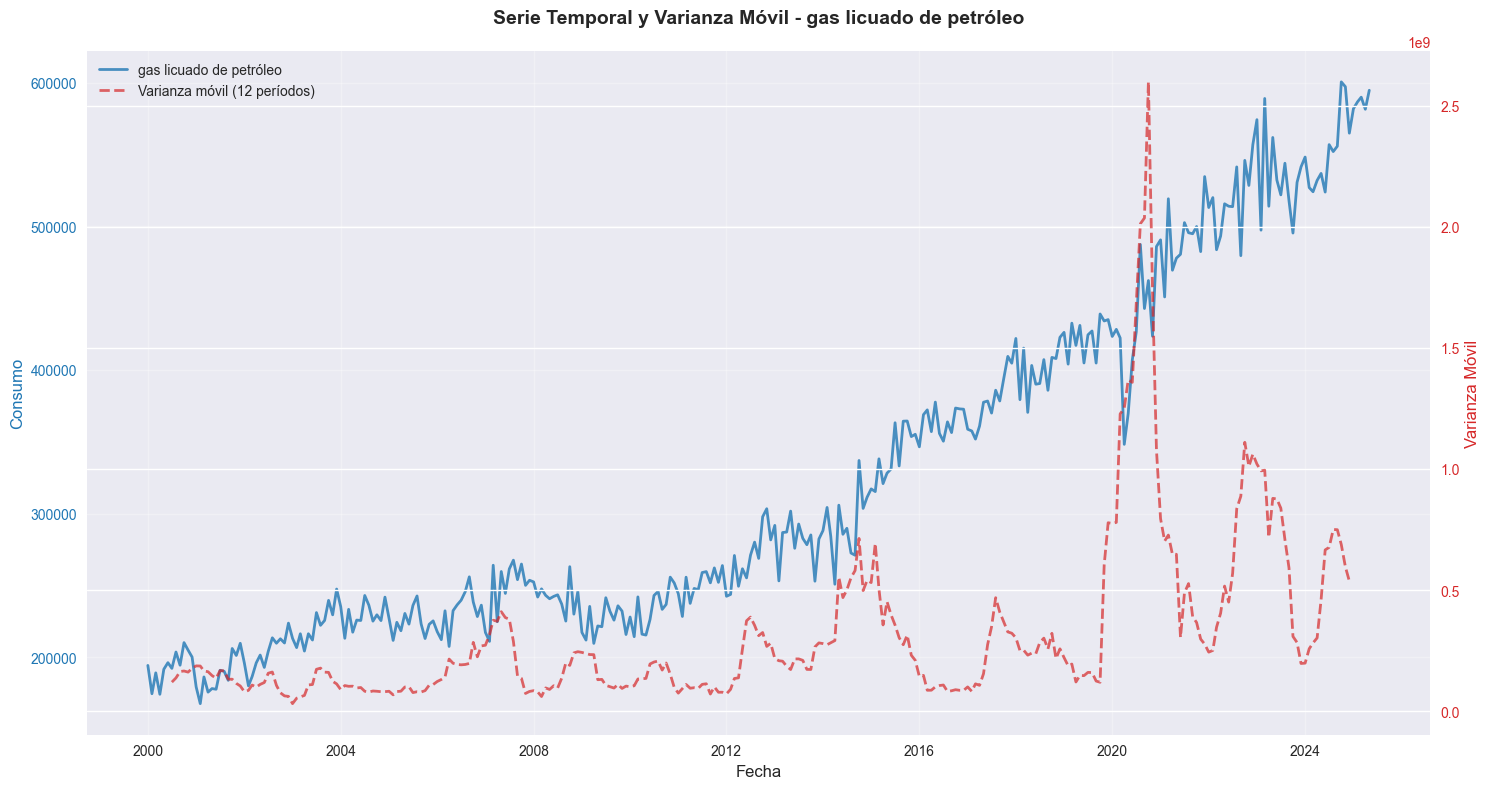

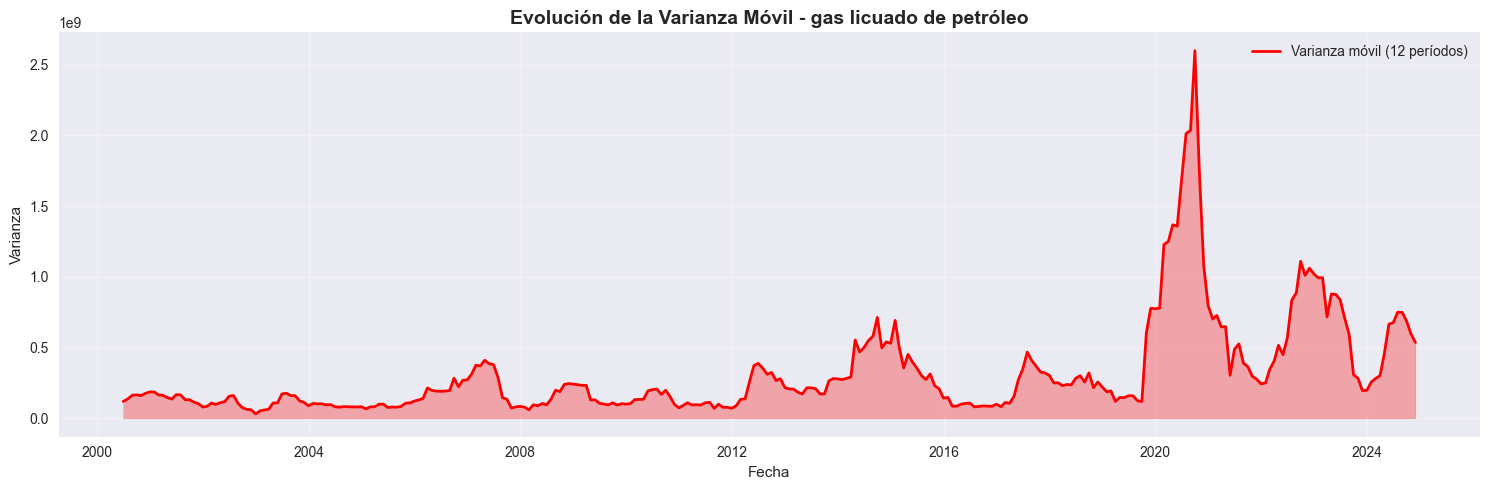


PRUEBA AUGMENTED DICKEY-FULLER - GAS LICUADO DE PETRÓLEO
Estadístico ADF: 1.5592
P-valor: 0.9977
Número de lags utilizados: 6
Número de observaciones: 298
Valores críticos:
	1%: -3.4525
	5%: -2.8713
	10%: -2.5720

❌ RESULTADO: La serie NO ES ESTACIONARIA (p-valor = 0.9977 > 0.05)
   No se puede rechazar la hipótesis nula de raíz unitaria

PRUEBA KPSS - GAS LICUADO DE PETRÓLEO
Estadístico KPSS: 2.6327
P-valor: 0.0100
Número de lags: 10
Valores críticos:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

❌ RESULTADO KPSS: La serie NO ES ESTACIONARIA (p-valor = 0.0100 ≤ 0.05)
   Se rechaza la hipótesis nula de estacionariedad


🔍 ANALIZANDO: DIESEL


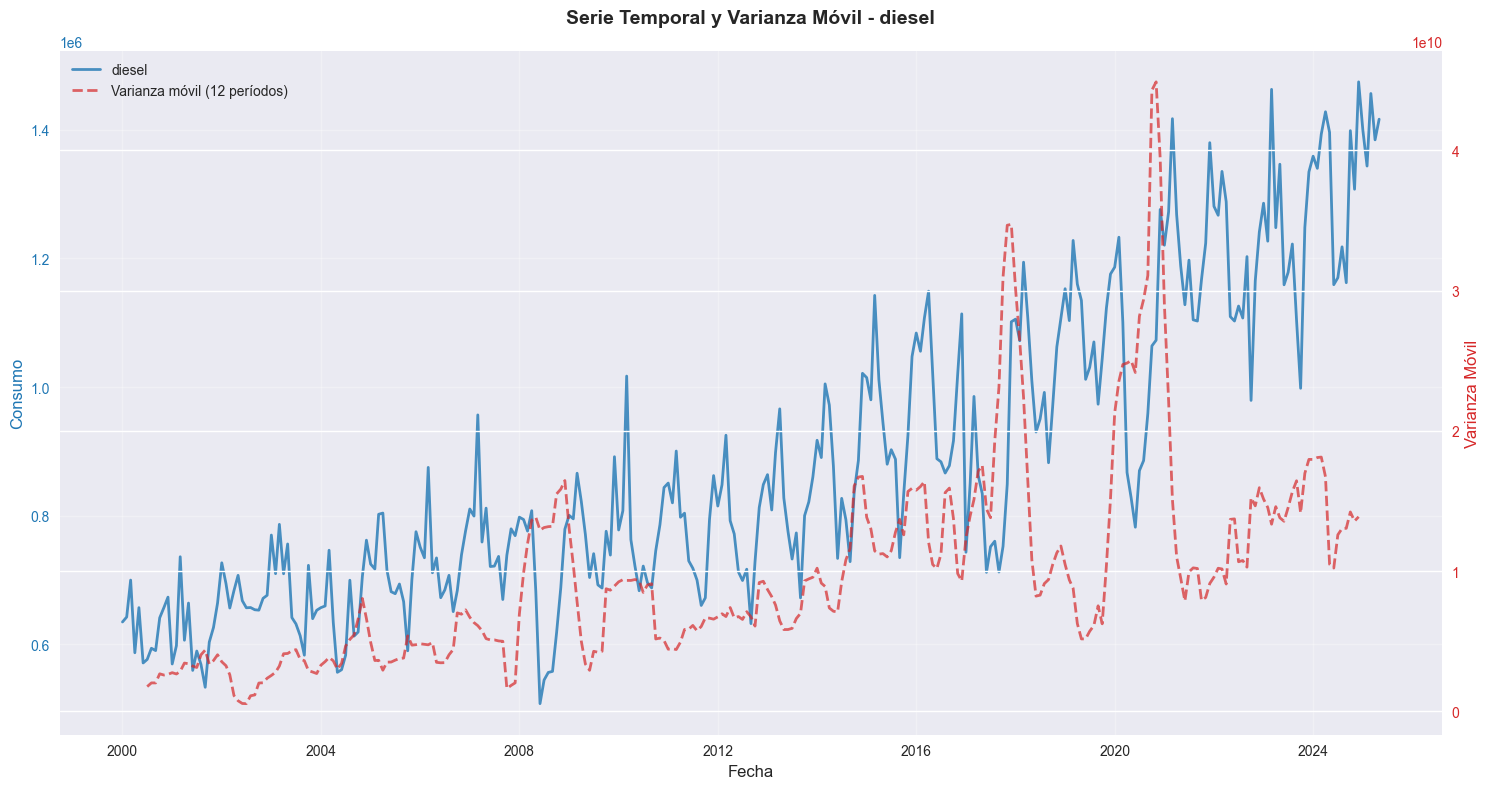

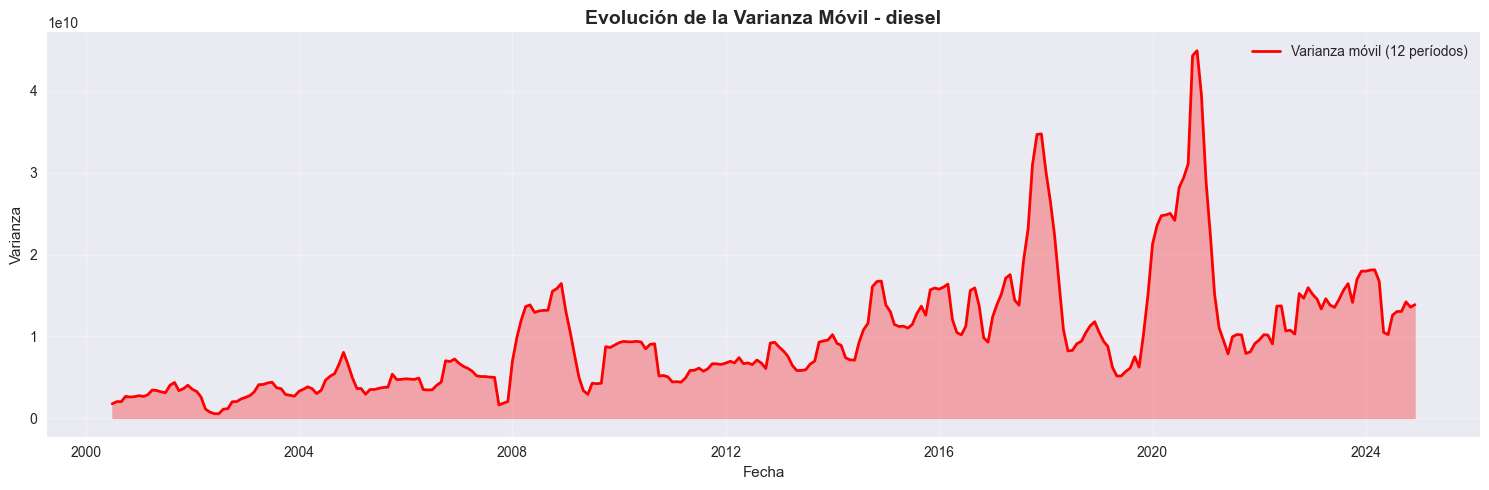


PRUEBA AUGMENTED DICKEY-FULLER - DIESEL
Estadístico ADF: 0.1782
P-valor: 0.9710
Número de lags utilizados: 12
Número de observaciones: 292
Valores críticos:
	1%: -3.4529
	5%: -2.8715
	10%: -2.5721

❌ RESULTADO: La serie NO ES ESTACIONARIA (p-valor = 0.9710 > 0.05)
   No se puede rechazar la hipótesis nula de raíz unitaria

PRUEBA KPSS - DIESEL
Estadístico KPSS: 2.6070
P-valor: 0.0100
Número de lags: 10
Valores críticos:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

❌ RESULTADO KPSS: La serie NO ES ESTACIONARIA (p-valor = 0.0100 ≤ 0.05)
   Se rechaza la hipótesis nula de estacionariedad


RESUMEN ESTADÍSTICO - TODAS LAS SERIES
                gasolina superior  gasolina regular  gas licuado de petróleo  \
Media                   474465.50         405016.80                322885.82   
Mediana                 424438.71         290286.65                268875.10   
Desv. Estándar          117354.12         225100.21                118981.77   
Varianza           13771988689.25    50

In [446]:
resultados = analizar_series_combustibles(
    df=consumo_filtrado, 
    columnas_deseadas=['gasolina superior', 'gasolina regular', 'gas licuado de petróleo', 'diesel'],
    ventana_varianza=12
)

Como podemos observar en consumo todos sus componentes no son estacionarios en media y en varianza por lo que vamos a hacer es hacer una diferenciacion y logaritmo

### Transformacion Estacionariedad de Consumo

#### Transformacion Logaritmica


🔄 TRANSFORMACIÓN LOGARÍTMICA: GASOLINA SUPERIOR


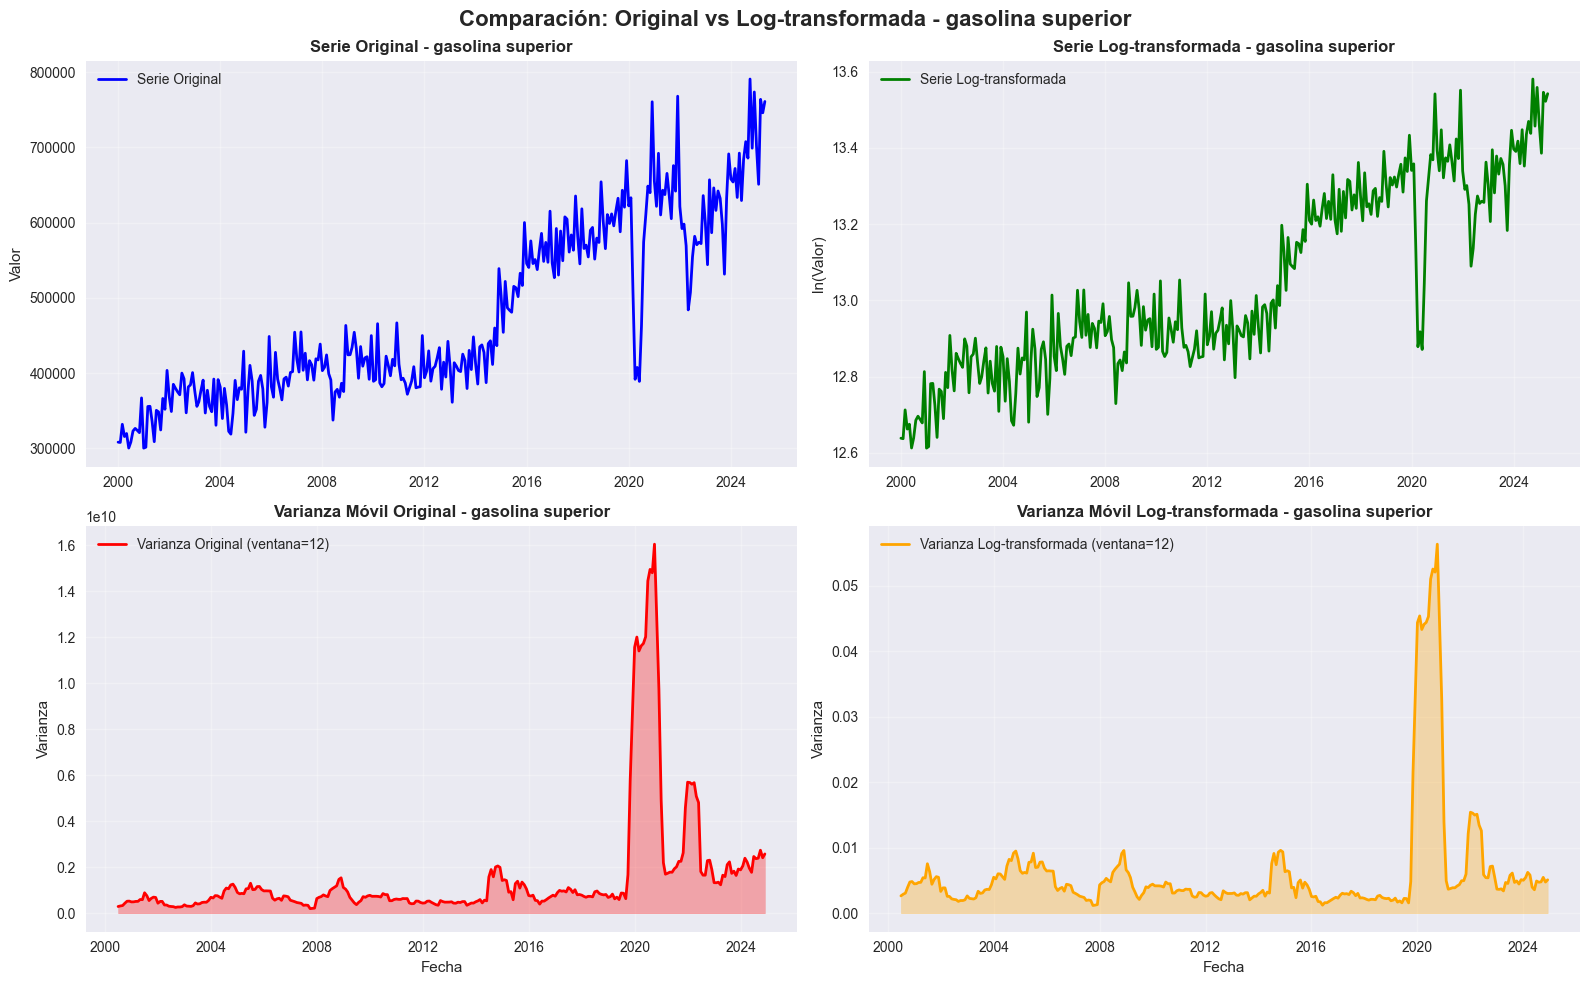


📊 ESTADÍSTICAS COMPARATIVAS:
Métrica                   Original        Log-transformada Mejora    
----------------------------------------------------------------------
Coef. Variación (%)       24.7340         1.8331          92.59     %
Varianza Media            1552730210.6005 0.0063          100.00    %
Desv. Estándar            117354.1166     0.2391         

✅ RESULTADO: La transformación logarítmica MEJORÓ la estabilidad de varianza
   Reducción del coeficiente de variación: 92.59%

🔄 TRANSFORMACIÓN LOGARÍTMICA: GASOLINA REGULAR


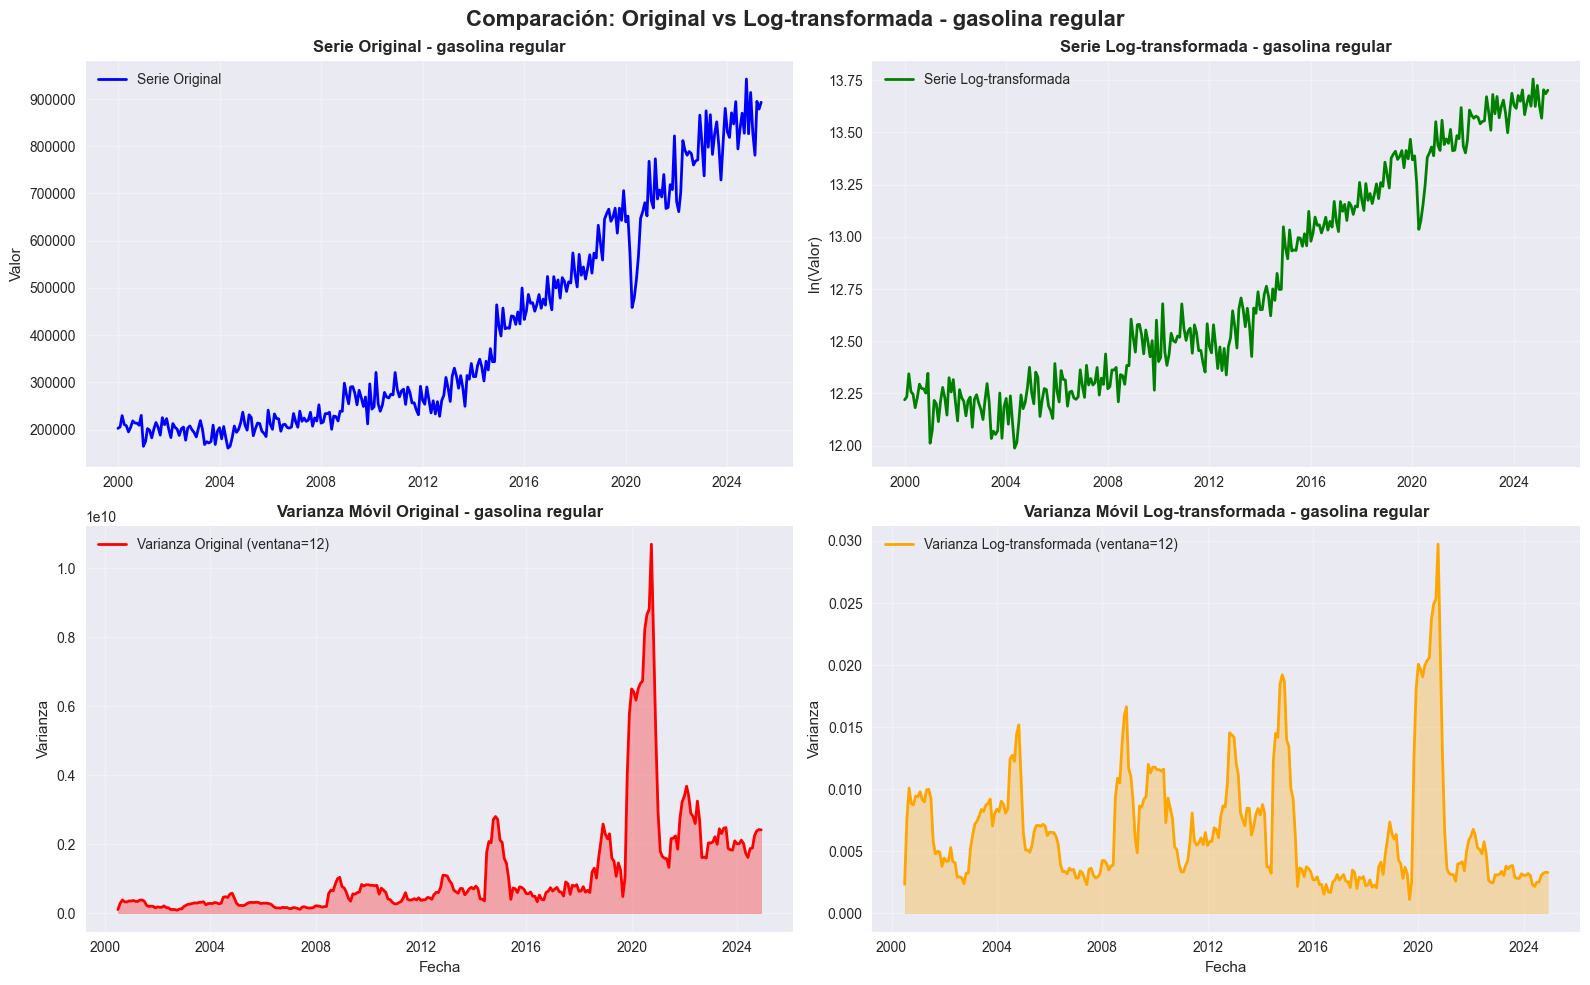


📊 ESTADÍSTICAS COMPARATIVAS:
Métrica                   Original        Log-transformada Mejora    
----------------------------------------------------------------------
Coef. Variación (%)       55.5780         4.1444          92.54     %
Varianza Media            1174000075.6193 0.0067          100.00    %
Desv. Estándar            225100.2123     0.5291         

✅ RESULTADO: La transformación logarítmica MEJORÓ la estabilidad de varianza
   Reducción del coeficiente de variación: 92.54%

🔄 TRANSFORMACIÓN LOGARÍTMICA: DIESEL


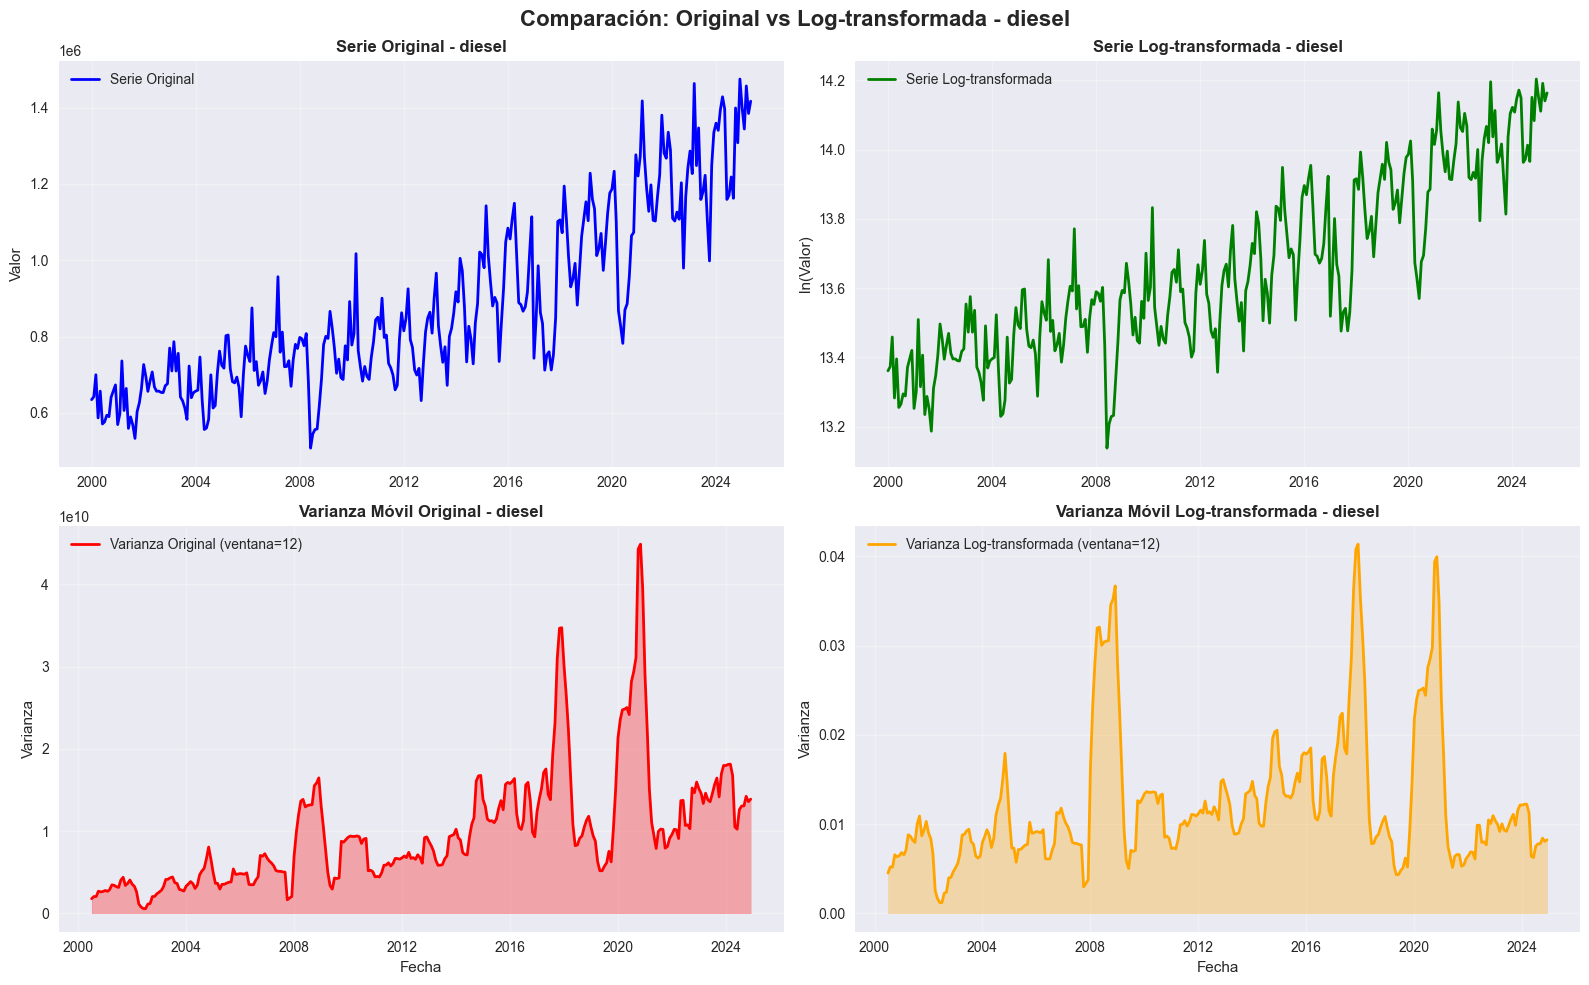


📊 ESTADÍSTICAS COMPARATIVAS:
Métrica                   Original        Log-transformada Mejora    
----------------------------------------------------------------------
Coef. Variación (%)       26.3558         1.8523          92.97     %
Varianza Media            9820542944.4271 0.0123          100.00    %
Desv. Estándar            231982.9870     0.2529         

✅ RESULTADO: La transformación logarítmica MEJORÓ la estabilidad de varianza
   Reducción del coeficiente de variación: 92.97%


In [448]:
df_log = transformacion_logaritmica(
    df=consumo_filtrado,
    columnas_deseadas=['gasolina superior', 'gasolina regular', 'diesel'],
    ventana_varianza=12
)

#### Transformacion Diferenciacion


🔍 DIFERENCIACIÓN ITERATIVA: GASOLINA SUPERIOR


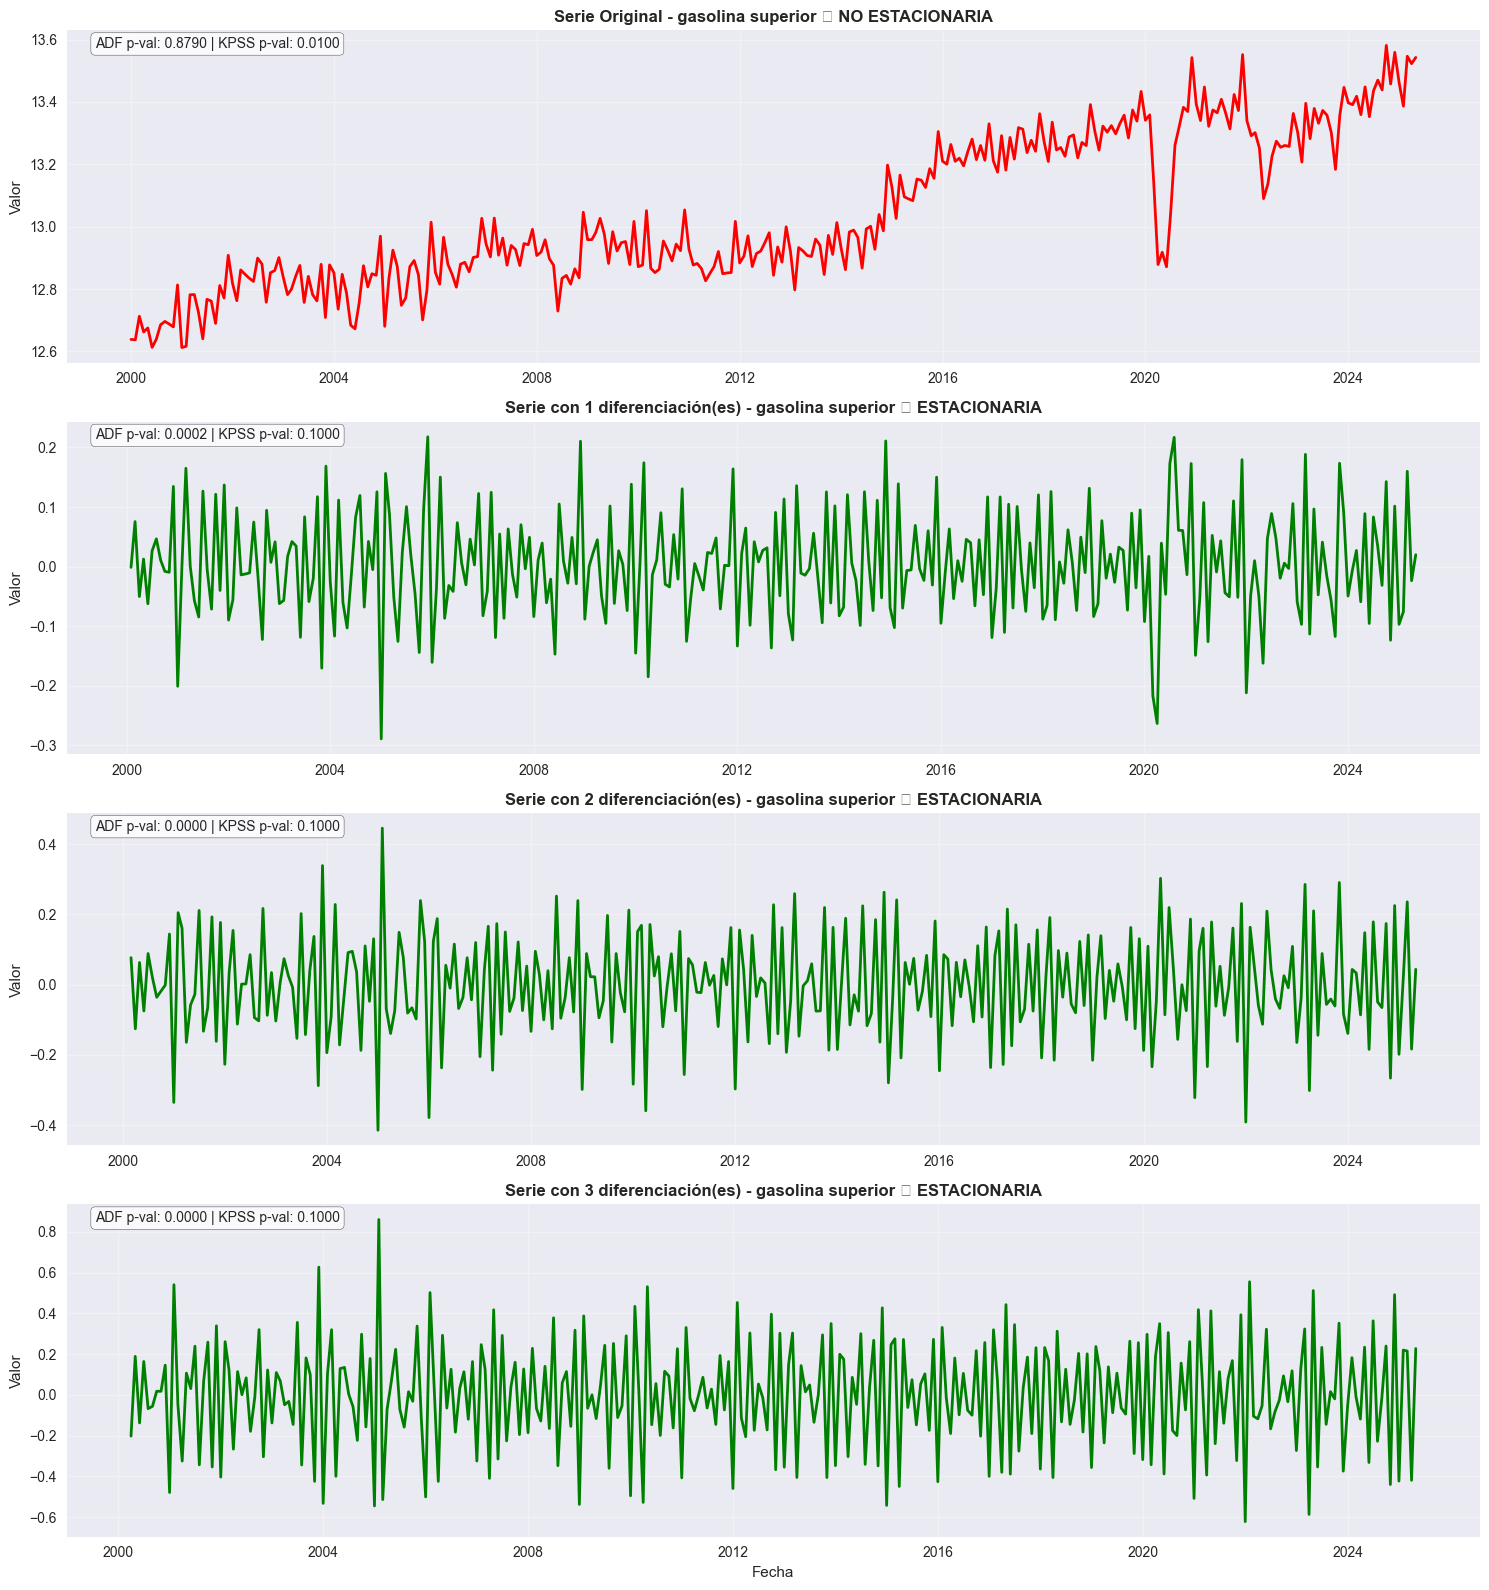


📋 RESUMEN DE DIFERENCIACIONES:
Orden    ADF p-val    ADF Est.   KPSS p-val   KPSS Est.  Consenso  
----------------------------------------------------------------------
0        0.8790       ❌          0.0100       ❌          ❌         
1        0.0002       ✅          0.1000       ✅          ✅         
2        0.0000       ✅          0.1000       ✅          ✅         
3        0.0000       ✅          0.1000       ✅          ✅         

💡 RECOMENDACIÓN:
   ✅ Usar 1 diferenciación(es) para lograr estacionariedad

🔍 DIFERENCIACIÓN ITERATIVA: GASOLINA REGULAR


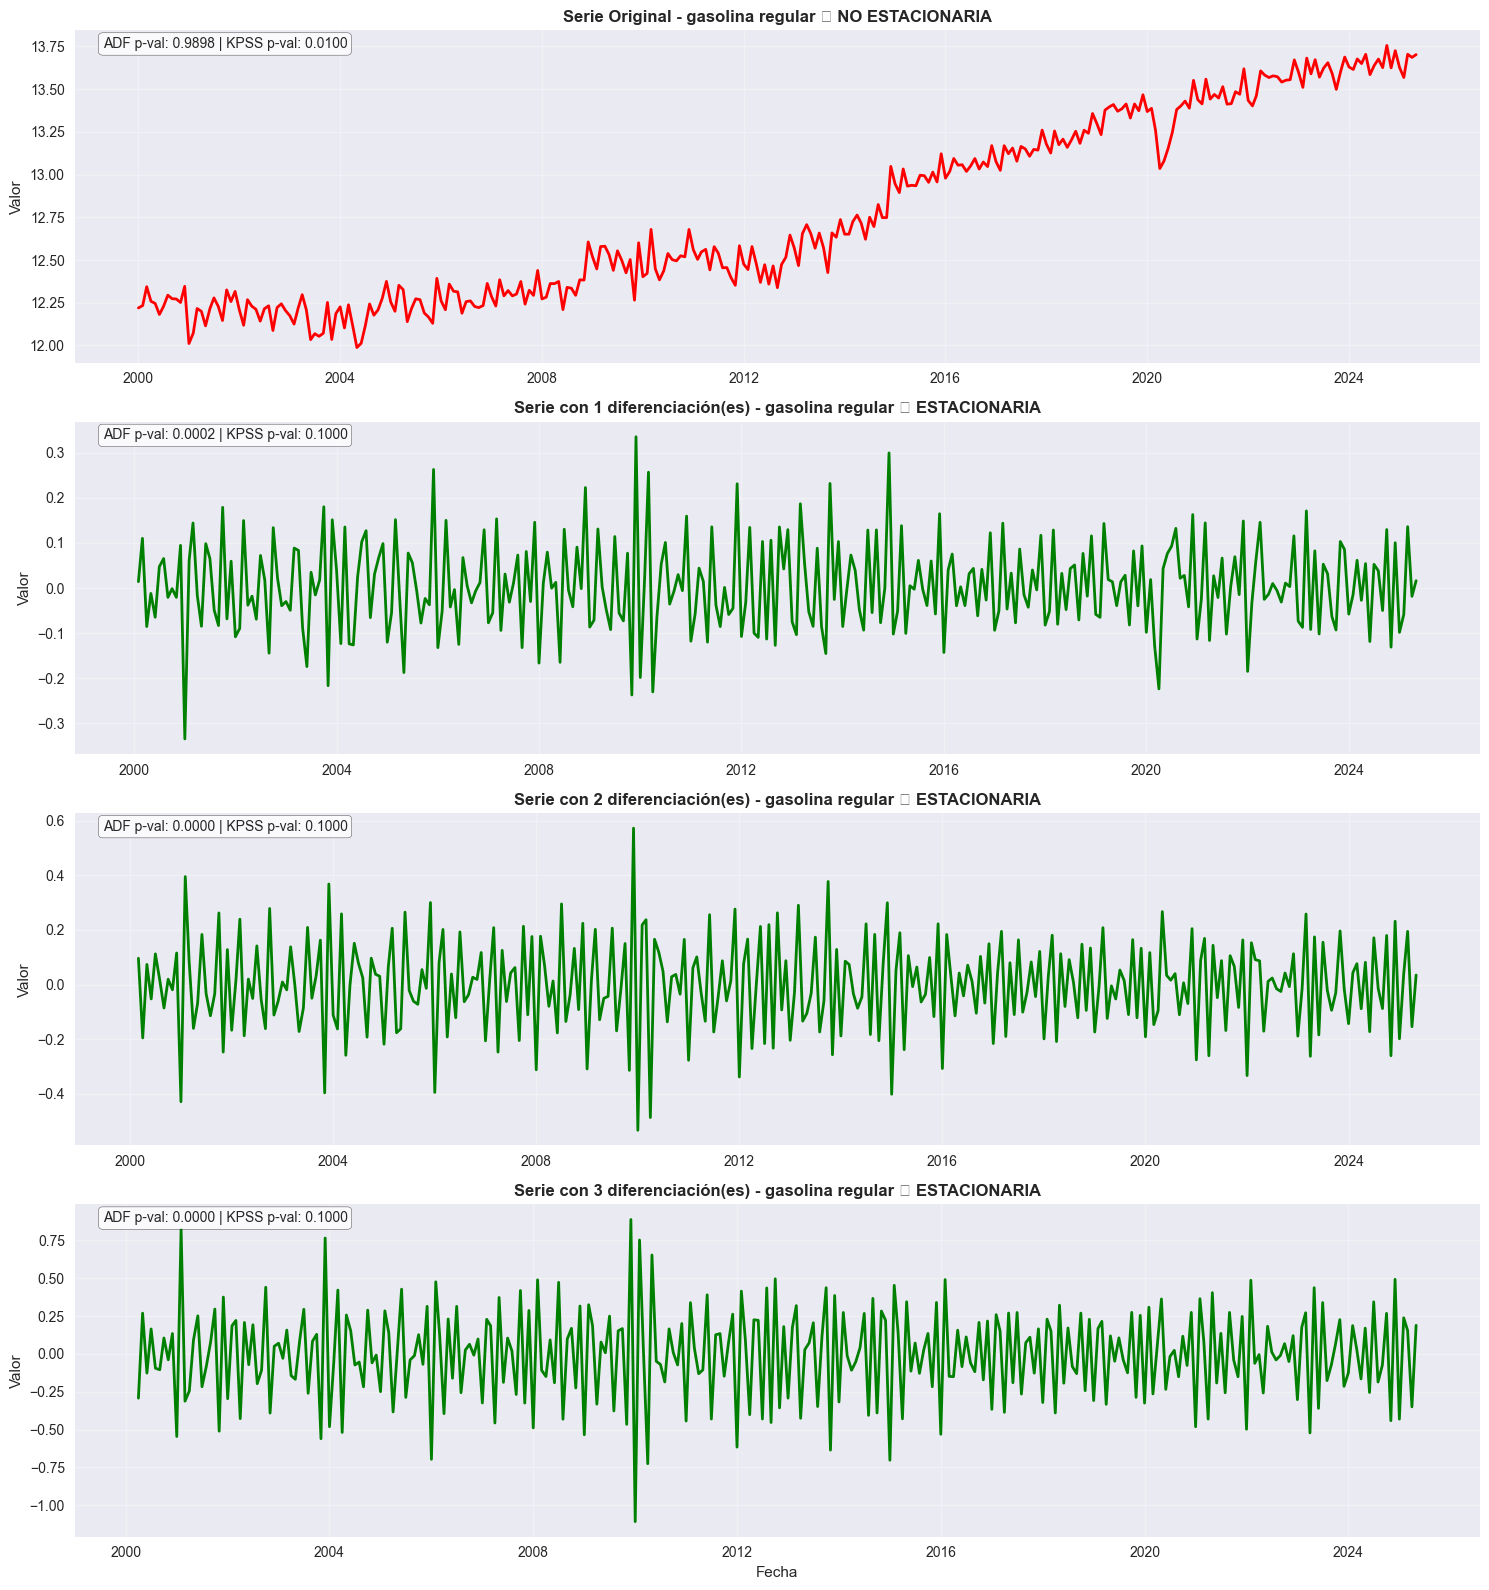


📋 RESUMEN DE DIFERENCIACIONES:
Orden    ADF p-val    ADF Est.   KPSS p-val   KPSS Est.  Consenso  
----------------------------------------------------------------------
0        0.9898       ❌          0.0100       ❌          ❌         
1        0.0002       ✅          0.1000       ✅          ✅         
2        0.0000       ✅          0.1000       ✅          ✅         
3        0.0000       ✅          0.1000       ✅          ✅         

💡 RECOMENDACIÓN:
   ✅ Usar 1 diferenciación(es) para lograr estacionariedad

🔍 DIFERENCIACIÓN ITERATIVA: DIESEL


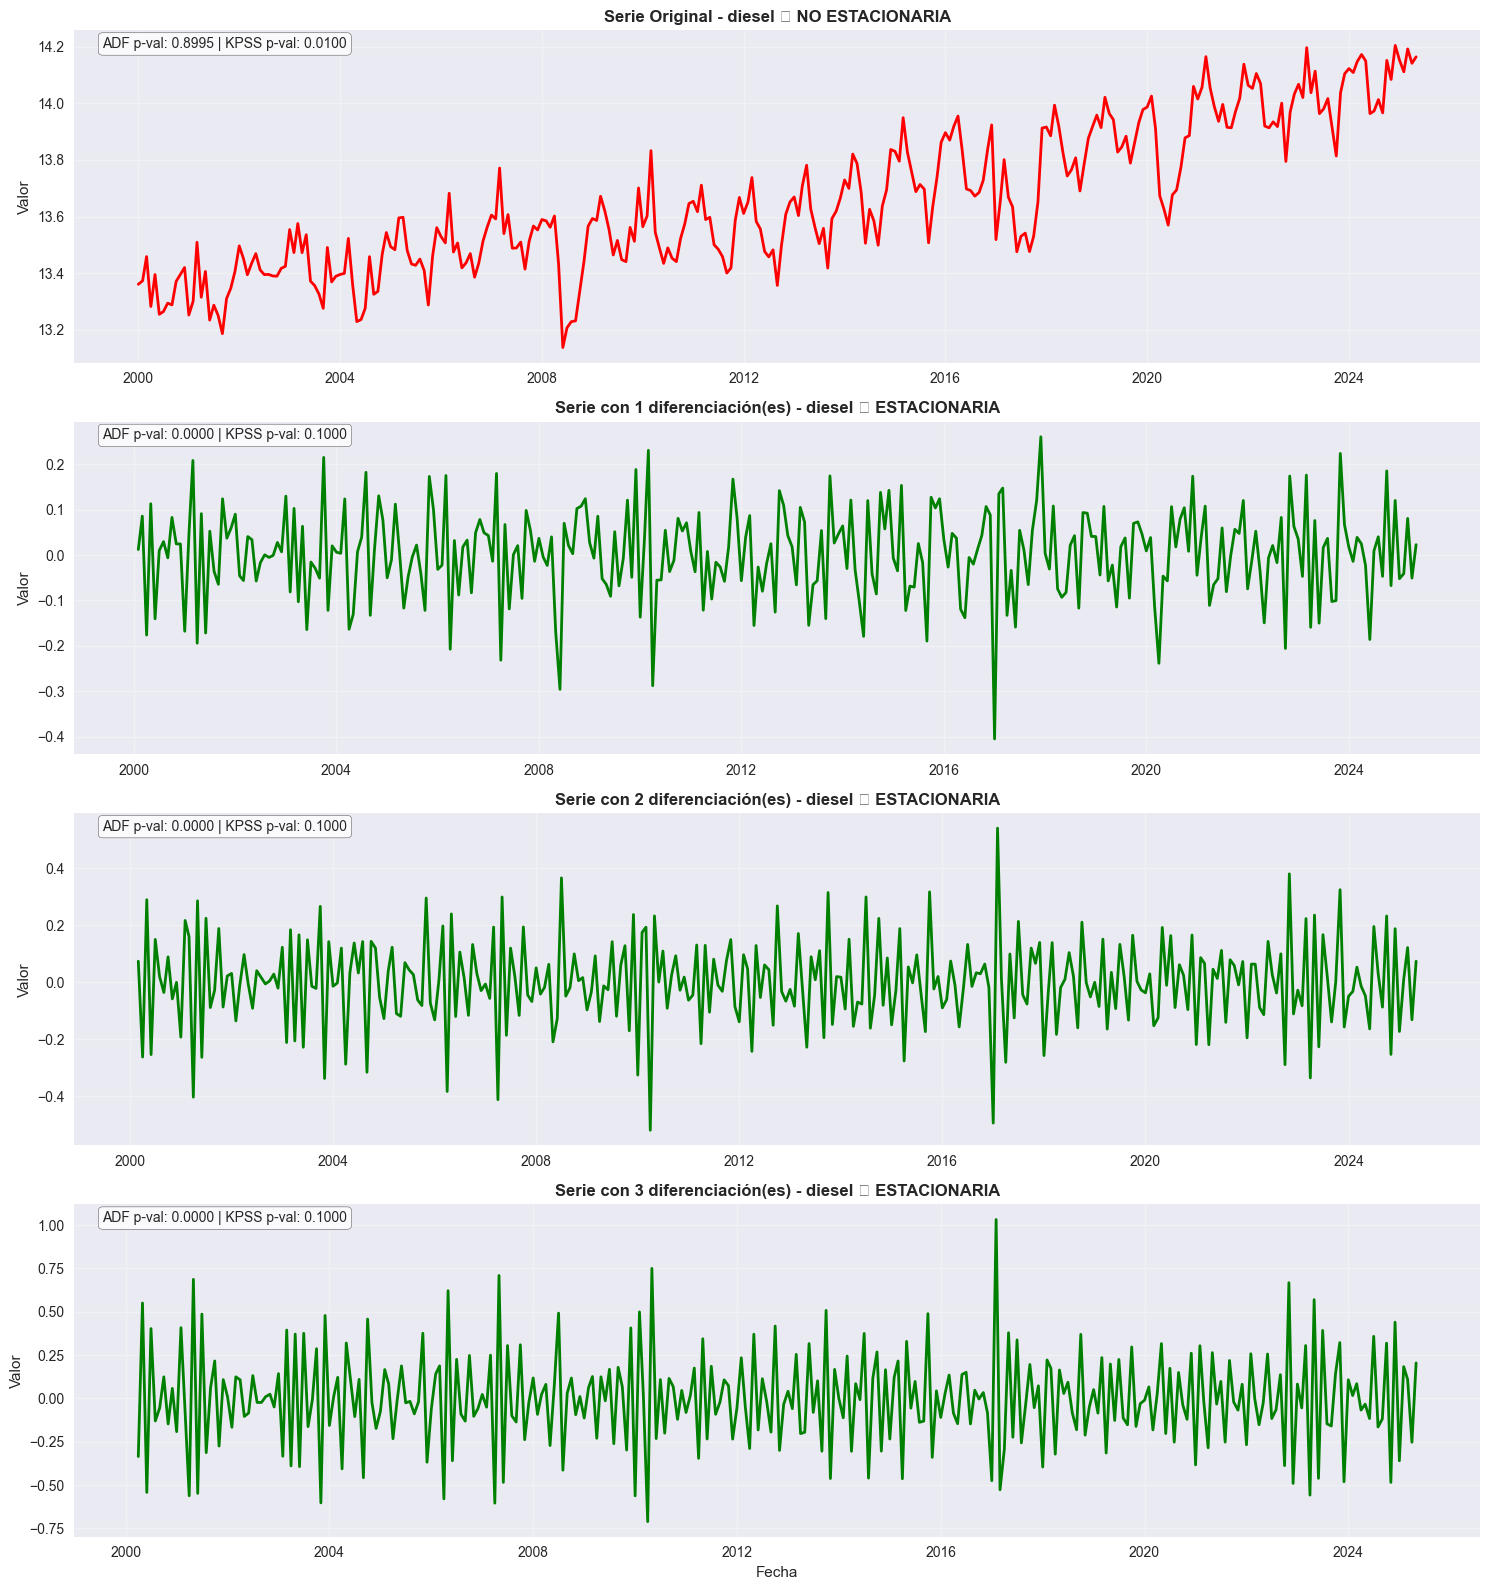


📋 RESUMEN DE DIFERENCIACIONES:
Orden    ADF p-val    ADF Est.   KPSS p-val   KPSS Est.  Consenso  
----------------------------------------------------------------------
0        0.8995       ❌          0.0100       ❌          ❌         
1        0.0000       ✅          0.1000       ✅          ✅         
2        0.0000       ✅          0.1000       ✅          ✅         
3        0.0000       ✅          0.1000       ✅          ✅         

💡 RECOMENDACIÓN:
   ✅ Usar 1 diferenciación(es) para lograr estacionariedad


In [449]:
resultados_diff = diferenciacion_series(
    df=df_log,  # Usar el DataFrame log-transformado
    columnas_deseadas=['gasolina superior', 'gasolina regular', 'diesel'],
    max_diferencias=3
)

## Construcción de modelos de predicción

Ahora vamos a crear distintos modelos de predicción para cada una de las variables

### Consumos

Primero vamos con los consumos de combustibles, en el análisis de tiempo vimos que 